In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"
import numpy as np
import matplotlib.pyplot as plt
from facilities import store_object, retrieve_object
from dPCA import dPCA
import pdb
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## setup paths -- IMPORTANT: update `dirpath` with your path/to/multi-area-cleaned

In [7]:
dirpath = "/Users/michael/Documents/GitHub/multi-area-cleaned/"
loadpath_dpca = dirpath + "sims/revision/scratch_data_dpca/"
loadpath_exemplar_dpca = dirpath + "sims/revision/exemplar_new/scratch_data_dpca/"
loadpath_data = dirpath + 'sims/revision/scratch_data/'
loadpath_exemplar_data = dirpath + 'sims/revision/exemplar_new/scratch_data/'
loadpath_mi = dirpath + "/sims/revision/scratch_data_mi/"
loadpath_exemplar_mi = dirpath + "sims/revision/exemplar_new/scratch_data_mi/"
loadpath_output = dirpath + "sims/revision/scratch_data_output/"
savepath_figs = dirpath + "sims/revision/figs/"
savepath_exemplar_figs = dirpath + "sims/revision/exemplar_new/figs/"

if not os.path.exists(savepath_figs):
    os.makedirs(savepath_figs)
    
if not os.path.exists(savepath_exemplar_figs):
    os.makedirs(savepath_exemplar_figs)

## color, context, and direction across areas

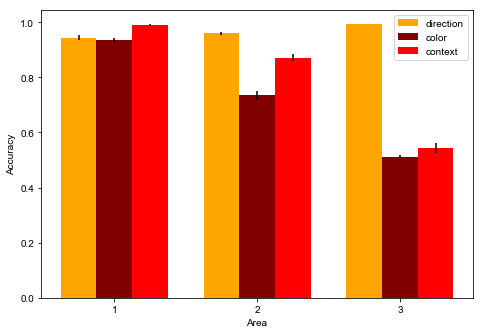

In [8]:
# Figure 2g

basepath = '2020-04-10_cb_simple_3areas'

d_mi = np.load(loadpath_mi + basepath + '_acc_direction_layers.npy')
c_mi = np.load(loadpath_mi + basepath + '_acc_color_layers.npy')
x_mi = np.load(loadpath_mi + basepath + '_acc_context_layers.npy')

fig = plt.figure()
data = np.vstack((np.mean(d_mi, axis=0), np.mean(c_mi, axis=0), np.mean(x_mi, axis=0)))
sem = np.vstack((np.std(d_mi, axis=0), np.std(c_mi, axis=0), np.std(x_mi, axis=0)))/np.sqrt(8)
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.xticks([0.25, 1.25, 2.25], ['1', '2', '3'])
plt.legend()

savepath = savepath_figs
plt.savefig(savepath + 'mi_layers' + '.pdf')

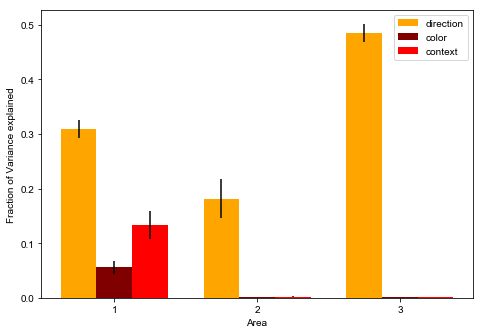

In [9]:
# Figure 2e - dpca variance explained by each axis per area

loadpath = loadpath_dpca
dvar = np.load(loadpath + 'dpca_layers_direction.npy')
cvar = np.load(loadpath + 'dpca_layers_color.npy')
xvar = np.load(loadpath + 'dpca_layers_context.npy')

data = np.vstack((np.mean(dvar, axis=0), np.mean(cvar, axis=0), np.mean(xvar, axis=0)))
sem = np.vstack((np.std(dvar, axis=0), np.std(cvar, axis=0), np.std(xvar, axis=0)))/np.sqrt(8)

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.legend()

plt.ylabel('Fraction of Variance explained')
plt.xlabel('Area')
plt.xticks([0.25, 1.25, 2.25], ['1', '2', '3'])

savepath = savepath_figs
plt.savefig(savepath + 'dpca_variance_layers' + '.pdf')

## Accuracy and mutual information as a function of areas.

These constitute Figure S3. To get mutual information remove `_acc`

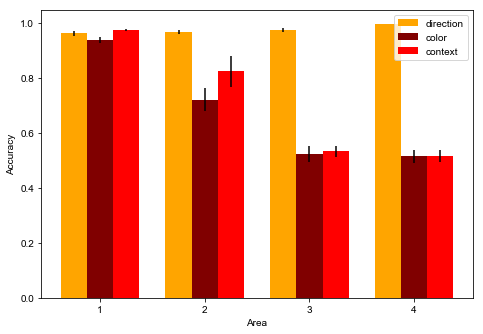

In [10]:
# four area

basepath = '2020-04-10_cb_simple_4areas'

d_acc = np.load(loadpath_mi + basepath + '_acc_direction_layers.npy')
c_acc = np.load(loadpath_mi + basepath + '_acc_color_layers.npy')
x_acc = np.load(loadpath_mi + basepath + '_acc_context_layers.npy')

# d_acc = np.load(loadpath_mi + basepath + '_direction_layers.npy')
# c_acc = np.load(loadpath_mi + basepath + '_color_layers.npy')
# x_acc = np.load(loadpath_mi + basepath + '_context_layers.npy')

d_acc = np.delete(d_acc, 5, axis=0)
c_acc = np.delete(c_acc, 5, axis=0)
x_acc = np.delete(x_acc, 5, axis=0)
# acc_null = np.load(loadpath_mi + basepath + '_acc_color_nulldist.npy')

fig = plt.figure()
data = np.vstack((np.mean(d_acc, axis=0), np.mean(c_acc, axis=0), np.mean(x_acc, axis=0)))
sem = np.vstack((np.std(d_acc, axis=0), np.std(c_acc, axis=0), np.std(x_acc, axis=0)))/np.sqrt(8)
X = np.arange(4)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.xticks([0.25, 1.25, 2.25, 3.25], ['1', '2', '3', '4'])
plt.legend()

savepath = savepath_figs
plt.savefig(savepath + 'accuracy_layers' + '.pdf')

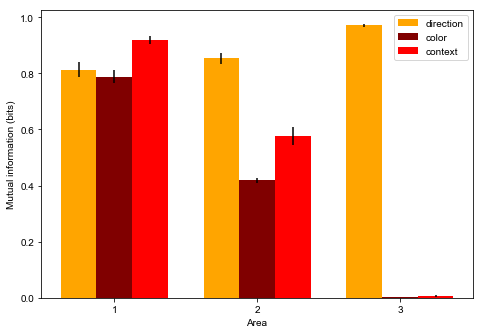

In [11]:
basepath = '2020-04-10_cb_simple_3areas'

d_mi = np.load(loadpath_mi + basepath + '_direction_layers.npy')
c_mi = np.load(loadpath_mi + basepath + '_color_layers.npy')
x_mi = np.load(loadpath_mi + basepath + '_context_layers.npy')

fig = plt.figure()
data = np.vstack((np.mean(d_mi, axis=0), np.mean(c_mi, axis=0), np.mean(x_mi, axis=0)))
sem = np.vstack((np.std(d_mi, axis=0), np.std(c_mi, axis=0), np.std(x_mi, axis=0)))/np.sqrt(8)
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Area')
plt.xticks([0.25, 1.25, 2.25], ['1', '2', '3'])
plt.legend()

savepath = savepath_figs
plt.savefig(savepath + 'mi_layers' + '.pdf')

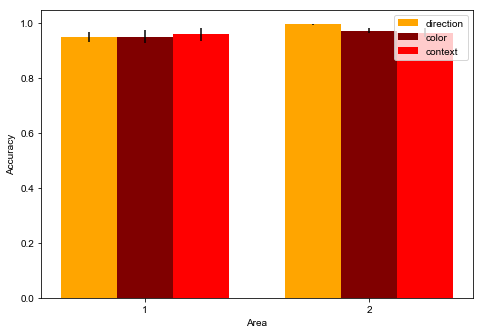

In [12]:
basepath = '2020-04-10_cb_simple_2areas'

d_acc = np.load(loadpath_mi + basepath + '_acc_direction_layers.npy')
c_acc = np.load(loadpath_mi + basepath + '_acc_color_layers.npy')
x_acc = np.load(loadpath_mi + basepath + '_acc_context_layers.npy')

# acc_null = np.load(loadpath_mi + basepath + '_acc_color_nulldist.npy')

fig = plt.figure()
data = np.vstack((np.mean(d_acc, axis=0), np.mean(c_acc, axis=0), np.mean(x_acc, axis=0)))
sem = np.vstack((np.std(d_acc, axis=0), np.std(c_acc, axis=0), np.std(x_acc, axis=0)))/np.sqrt(8)
X = np.arange(2)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.xticks([0.25, 1.25], ['1', '2'])
plt.legend()

savepath = savepath_figs
plt.savefig(savepath + 'accuracy_layers' + '.pdf')

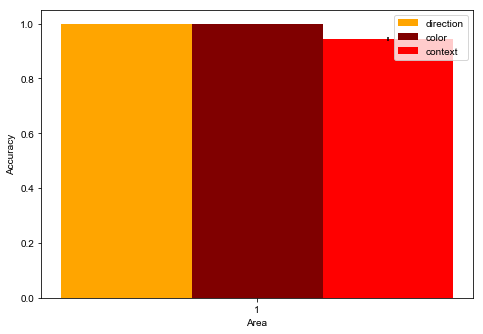

In [13]:
basepath = '2020-04-10_cb_simple_1area'

d_acc = np.load(loadpath_mi + basepath + '_acc_direction_layers.npy')
c_acc = np.load(loadpath_mi + basepath + '_acc_color_layers.npy')
x_acc = np.load(loadpath_mi + basepath + '_acc_context_layers.npy')

# acc_null = np.load(loadpath_mi + basepath + '_acc_color_nulldist.npy')

fig = plt.figure()
data = np.vstack((np.mean(d_acc, axis=0), np.mean(c_acc, axis=0), np.mean(x_acc, axis=0)))
sem = np.vstack((np.std(d_acc, axis=0), np.std(c_acc, axis=0), np.std(x_acc, axis=0)))/np.sqrt(8)
X = np.arange(1)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orange', width = 0.25, yerr=sem[0], label='direction')
ax.bar(X + 0.25, data[1], color = 'maroon', width = 0.25, yerr=sem[1], label='color')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.xticks([0.25], ['1'])
plt.legend()

savepath = savepath_figs
plt.savefig(savepath + 'accuracy_layers' + '.pdf')

## Discriminability

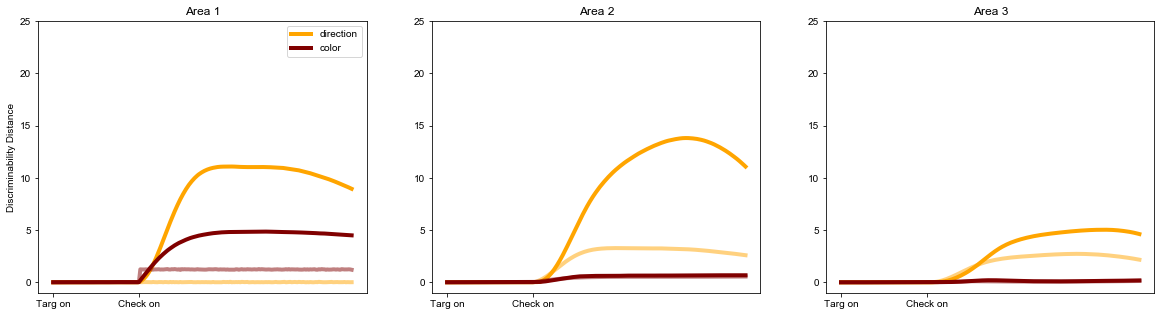

In [14]:
# Figure 5a - Activity difference between decisions

psths = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
rnn = retrieve_object('rnn.p', loadpath_exemplar_data)
wrec_activity = False # set to true if we want WREC * activity (might be more meaningful comparison)

Win = rnn.Win
Wrec = rnn.Wrec
W12 = Wrec[80:160, 0:80]
W23 = Wrec[160:240, 80:160]
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))


ra0 = psths[0]['psth']
ra1 = psths[1]['psth']
ra2 = psths[2]['psth']
ra3 = psths[3]['psth']

if wrec_activity:
    ra0 = Wrec.dot(ra0)
    ra1 = Wrec.dot(ra1)
    ra2 = Wrec.dot(ra2)
    ra3 = Wrec.dot(ra3)

# color 
inp3 = psths[3]['u_psth']
inp2 = psths[2]['u_psth']
inp1 = psths[1]['u_psth']
inp0 = psths[0]['u_psth']
diff_inp = (inp3-inp2 + inp1-inp0)/2
diffc = (ra3 - ra2 + ra1 - ra0)/2 # left green - left red + right green - right red

# diff_inp = inp3-inp2
# diffc = ra1 - ra0
norm1c = np.linalg.norm(diffc[idx1], axis=0)
norm2c = np.linalg.norm(diffc[idx2], axis=0)
norm3c = np.linalg.norm(diffc[idx3], axis=0)
proj2c = np.linalg.norm(W12.dot(diffc[idx1[:80]]), axis=0)
proj3c = np.linalg.norm(W23.dot(diffc[idx2[:80]]), axis=0)
proj1c = np.linalg.norm(Win.dot(diff_inp), axis=0)

# direction
# inp3 = psth.psths[1]['u_psth']
# inp2 = psth.psths[3]['u_psth']
diff_inp = (inp1-inp3 + inp0 -inp2)/2
diffd = (ra1 - ra3 + ra0 - ra2)/2 # right green - left green + right red - left red
norm1 = np.linalg.norm(diffd[idx1], axis=0)
norm2 = np.linalg.norm(diffd[idx2], axis=0)
norm3 = np.linalg.norm(diffd[idx3], axis=0)
proj2 = np.linalg.norm(W12.dot(diffd[idx1[:80]]), axis=0)
proj3 = np.linalg.norm(W23.dot(diffd[idx2[:80]]), axis=0)
proj1 = np.linalg.norm(Win.dot(diff_inp), axis=0)

fig, axs = plt.subplots(1,3, figsize=(20,5))
# fig.suptitle('Vertically stacked subplots')
idx_plot = (np.arange(90, 300))
axs[0].plot(norm1[idx_plot], 'orange', linewidth = 4, label='direction')
axs[0].plot(proj1[idx_plot], 'orange', alpha = 0.5, linewidth = 4)
axs[1].plot(norm2[idx_plot], 'orange', linewidth = 4)
axs[1].plot(proj2[idx_plot], 'orange', alpha = 0.5, linewidth = 4)
axs[2].plot(norm3[idx_plot], 'orange', linewidth = 4)
axs[2].plot(proj3[idx_plot], 'orange', alpha = 0.5, linewidth = 4)
axs[0].plot(norm1c[idx_plot], 'maroon', linewidth = 4, label='color')
axs[0].plot(proj1c[idx_plot], 'maroon', alpha = 0.5, linewidth = 4)
axs[1].plot(norm2c[idx_plot], 'maroon', linewidth = 4)
axs[1].plot(proj2c[idx_plot], 'maroon', alpha = 0.5, linewidth = 4)
axs[2].plot(norm3c[idx_plot], 'maroon', linewidth = 4)
axs[2].plot(proj3c[idx_plot], 'maroon', alpha = 0.5, linewidth = 4)
axs[0].set_xticks([0, 60]) 
axs[1].set_xticks([0, 60]) 
axs[2].set_xticks([0, 60]) 
axs[0].set_title('Area 1')
axs[1].set_title('Area 2')
axs[2].set_title('Area 3')
axs[0].set_xticklabels(['Targ on', 'Check on'])
axs[1].set_xticklabels(['Targ on', 'Check on'])
axs[2].set_xticklabels(['Targ on', 'Check on'])
axs[2].set_ylim(-1, 25)
axs[1].set_ylim(-1, 25)
axs[0].set_ylim(-1, 25)
axs[0].set_ylabel('Discriminability Distance')
axs[0].legend()

savepath = savepath_figs
# plt.savefig(savepath + '/dircol_diff_overall.pdf')

In [15]:
print('Color')
gain_range = np.arange(170, 270)
print(np.mean(norm1c[gain_range])/np.mean(proj1c[gain_range]))
print(np.mean(norm2c[gain_range])/np.mean(proj2c[gain_range]))
print(np.mean(norm3c[gain_range])/np.mean(proj3c[gain_range]))

print('Direction')
gain_range = np.arange(170, 270)
print(np.mean(norm1[gain_range])/np.mean(proj1[gain_range]))
print(np.mean(norm2[gain_range])/np.mean(proj2[gain_range]))
print(np.mean(norm3[gain_range])/np.mean(proj3[gain_range]))

print('Color attenuation between layers')
col_12 = np.mean(proj2c[gain_range])/np.mean(norm1c[gain_range])
col_23 = np.mean(proj3c[gain_range])/np.mean(norm2c[gain_range])
print(col_12)
print(col_23)

print('Direction attenuation between layers')
dir_12 = np.mean(proj2[gain_range])/np.mean(norm1[gain_range])
dir_23 = np.mean(proj3[gain_range])/np.mean(norm2[gain_range])
print(dir_12)
print(dir_23)

print('Relative attenuation: direction/color')
print(dir_12/col_12)
print(dir_23/col_23)

Color
3.706055544922908
1.2029540651306698
1.5093293406552704
Direction
498.0172879645514
3.4797492055957986
1.5974786438385162
Color attenuation between layers
0.11180916972231744
0.13487402273474255
Direction attenuation between layers
0.29789051783626036
0.21213086653733118
Relative attenuation: direction/color
2.6642762715802597
1.572807440870434


## dpca null potent

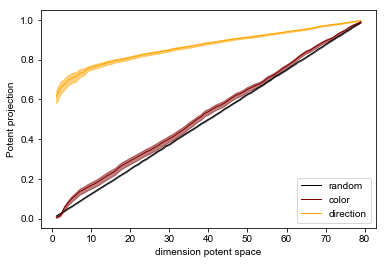

In [16]:
# Figure 7a - layer 1 to 2

loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.plot(x, y1, linewidth=1, color='black')
plt.plot(x, y2, linewidth=1, color='maroon')
plt.plot(x, y3, linewidth=1, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'))
savepath = savepath_figs
plt.savefig(savepath + 'dpca_null_potent_l12' + '.pdf')

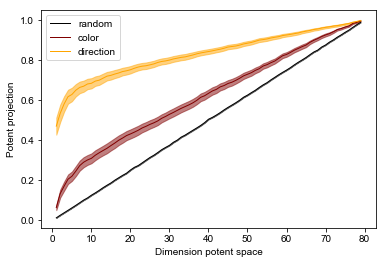

In [17]:
# Figure 7b - layer 2 to 3

loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca_l2.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.plot(x, y1, linewidth=1, color='black')
plt.plot(x, y2, linewidth=1, color='maroon')
plt.plot(x, y3, linewidth=1, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'))
savepath = savepath_figs
plt.savefig(savepath + 'dpca_null_potent_l23' + '.pdf')

### feedback

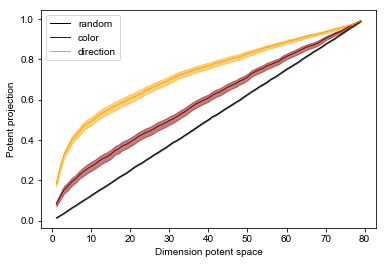

In [18]:
# Figure S12a

loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca_fb_l2.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.plot(x, y1, linewidth=1, color='black')
plt.plot(x, y2, linewidth=1, color='maroon')
plt.plot(x, y3, linewidth=1, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'))
savepath = savepath_figs
plt.savefig(savepath + 'dpca_null_potent_l21' + '.pdf')

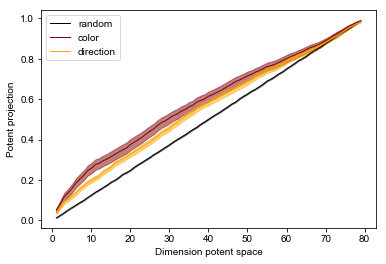

In [19]:
# Figure S12b

loadpath = loadpath_exemplar_dpca
layer2c_store = np.load(loadpath + 'null_potent_dpca_fb_l3.npy')

yerr=np.std(layer2c_store, axis=(0, 1)).T / np.sqrt(layer2c_store.shape[0] * layer2c_store.shape[1])
x = np.arange(1,80)
y1 = np.mean(layer2c_store, axis=(0, 1)).T[:, 1][1:]
y2 = np.mean(layer2c_store, axis=(0, 1)).T[:, 0][1:]
y3 = np.mean(layer2c_store, axis=(0, 1)).T[:, 2][1:]
yerr1 =yerr[1:, 1]
yerr2 =yerr[1:, 0]
yerr3 =yerr[1:, 2]

plt.plot(x, y1, linewidth=1, color='black')
plt.plot(x, y2, linewidth=1, color='maroon')
plt.plot(x, y3, linewidth=1, color='orange')
plt.fill_between(x, y1-yerr1, y1+yerr1, alpha = 0.5, color='black')
plt.fill_between(x, y2-yerr2, y2+yerr2, alpha = 0.5, color='maroon')
plt.fill_between(x, y3-yerr3, y3+yerr3, alpha = 0.5, color='orange')

plt.xlabel('Dimension potent space')
plt.ylabel('Potent projection')
plt.legend(('random','color', 'direction'))
savepath = savepath_figs
plt.savefig(savepath + 'dpca_null_potent_l32' + '.pdf')

## Hyperparameters

### mutual information and dpca variance sweeps

These sweeps correspond to Figure 3, and Figure S4. Note: You can access the direction values by replacing `_color` by `_direction`. 

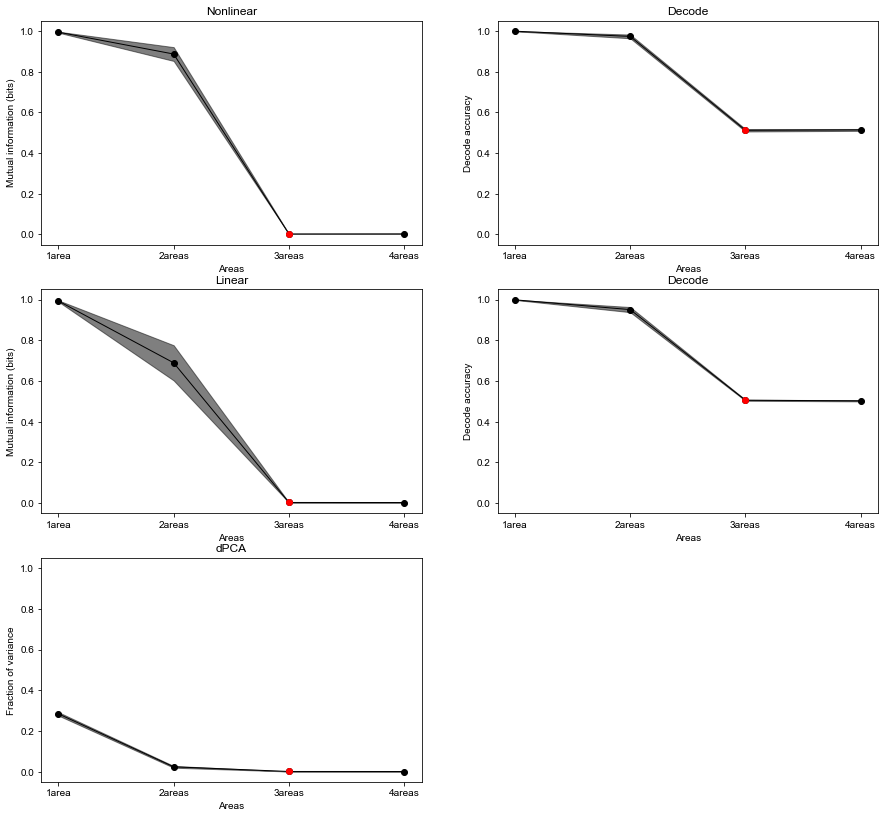

In [20]:
# Number of Areas

import numpy as np
import pdb
import matplotlib.pyplot as plt

basepath = '2020-04-10_cb_simple_'
params = ['1area', '2areas', '3areas', '4areas']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []


for param in params:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

# removing entry that did not train
mi_color[3] = np.delete(mi_color[3], 5)
acc_color[3] = np.delete(acc_color[3], 5)
mi_color_linear[3] = np.delete(mi_color_linear[3], 5)
acc_color_linear[3] = np.delete(acc_color_linear[3], 5)
dpca_color[3] = np.delete(dpca_color[3], 5)

# cannot just compute mean as axis is different length
mean_mi_color = np.array([sum(lst) / len(lst) for lst in mi_color])
sem_mi_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in mi_color])
mean_mi_color_linear = np.array([sum(lst) / len(lst) for lst in mi_color_linear])
sem_mi_color_linear = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in mi_color_linear])
mean_acc_color = np.array([sum(lst) / len(lst) for lst in acc_color])
sem_acc_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in acc_color])
mean_acc_color_linear = np.array([sum(lst) / len(lst) for lst in acc_color_linear])
sem_acc_color_linear = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in acc_color_linear])
mean_dpca_color = np.array([sum(lst) / len(lst) for lst in dpca_color])
sem_dpca_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in dpca_color])

x = [1, 2, 3, 4]
idx_paper = 2

plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Areas')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Decode accuracy')
plt.xlabel('Areas')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Areas')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Decode accuracy')
plt.xlabel('Areas')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Areas')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

savepath = savepath_figs
plt.savefig(savepath + 'mi_areas.pdf')

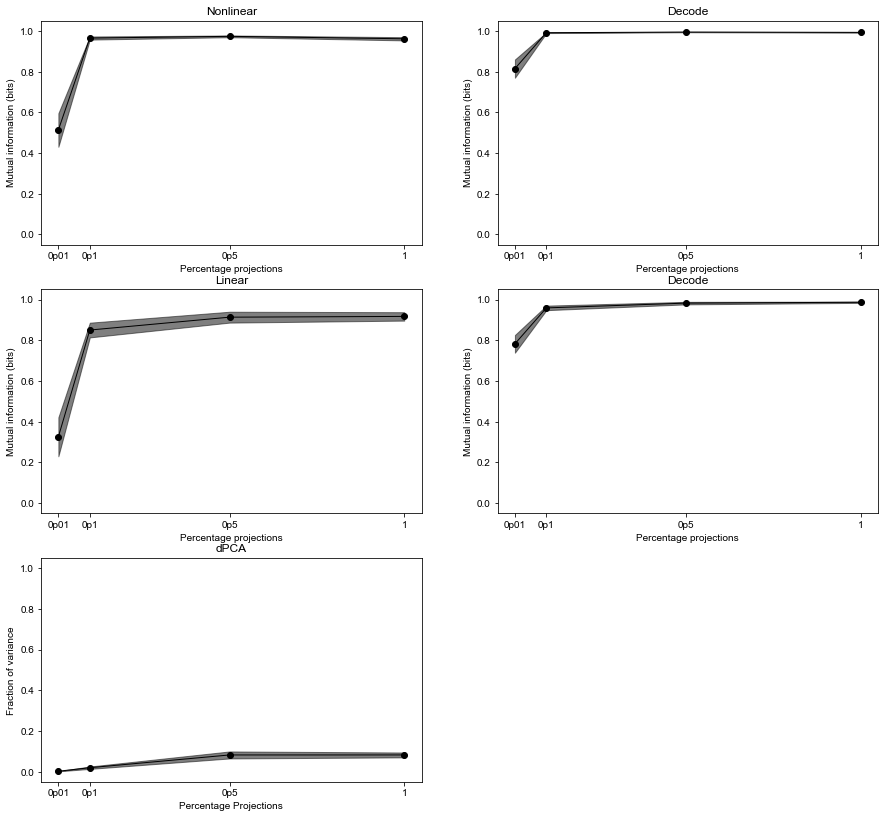

In [21]:
# feedforward inhibition

basepath = '2020-04-10_cb_simple_3areas_nodale_ff='
params = ['0p01', '0p1', '0p5', '1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

for param in params:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 10, 50, 100]
plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage Projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

savepath = "/Users/michael/Documents/GitHub/multi-area/sims/revision/figs/"
plt.savefig(savepath + 'mi_nodale.pdf')


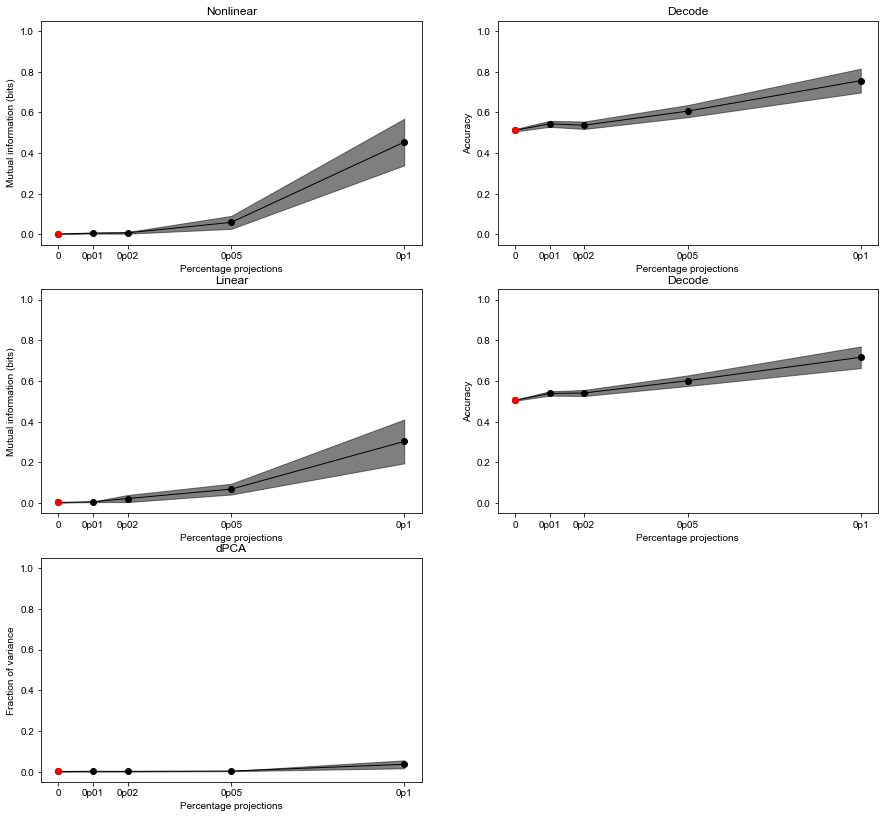

In [22]:
# Feedforward inhibition

params = ['0', '0p01', '0p02', '0p05', '0p1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas'
for param in params[:1]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))
    
basepath = '2020-04-10_cb_simple_3areas_correctdale_ffi='
for param in params[1:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 2, 3, 6, 11]

# x = [1, 10, 50, 100]
plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
idx_paper = 0
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
idx_paper = 0
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
idx_paper = 0
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
idx_paper = 0
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
idx_paper = 0
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

savepath = savepath_figs
plt.savefig(savepath + 'mi_ffi.pdf')

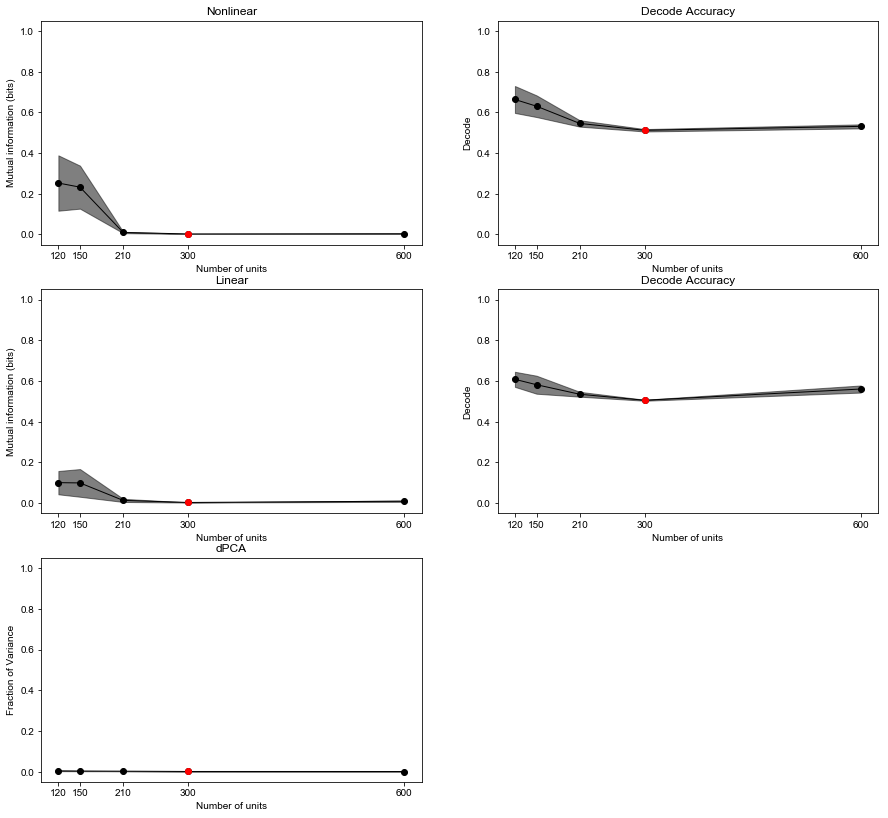

In [23]:
# Number of Units

params = ['120', '150', '210', '300', '600']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas_units='
for param in params[:3]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas'
for param in params[3:4]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas_units='
for param in params[4:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [12, 15, 21, 30, 60]
idx_paper = 3

plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Number of units')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Decode')
plt.xlabel('Number of units')
plt.title('Decode Accuracy')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Number of units')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Decode')
plt.xlabel('Number of units')
plt.title('Decode Accuracy')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of Variance')
plt.xlabel('Number of units')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


savepath = savepath_figs
plt.savefig(savepath + 'mi_units.pdf')


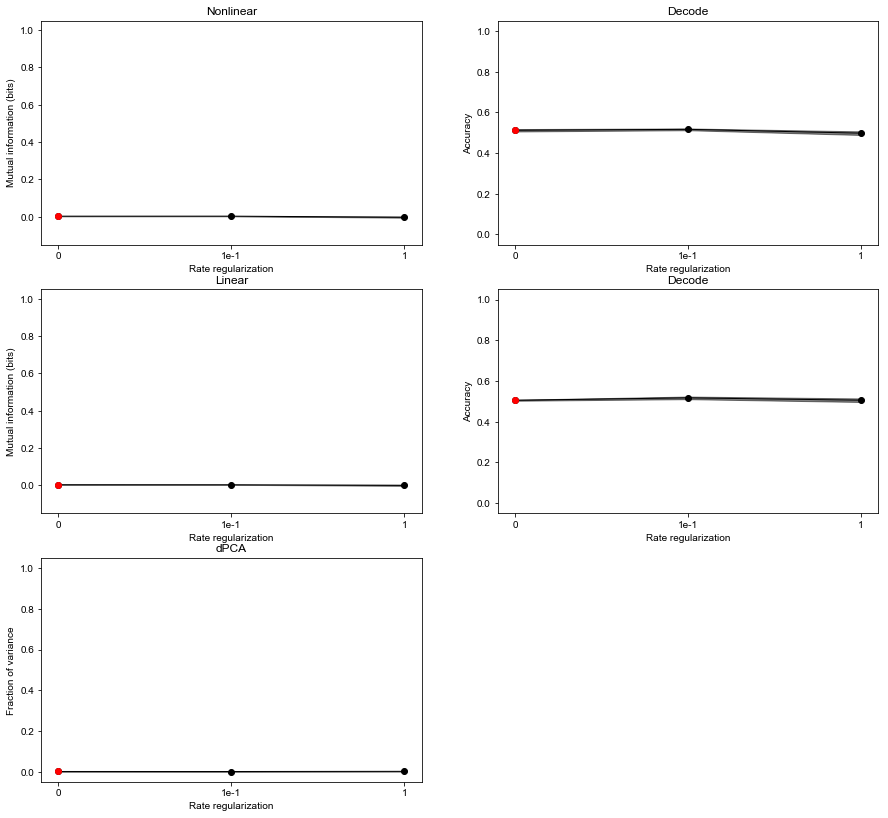

In [24]:
# Rate Regularization

params = ['0', '1e-1', '1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas'
for param in params[:1]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas_lambdar='
for param in params[1:3]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))
x = [1, 2, 3]
idx_paper = 0

plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Rate regularization')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.15, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Rate regularization')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Rate regularization')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.15, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Rate regularization')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Rate regularization')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

savepath = savepath_figs
plt.savefig(savepath + 'mi_lambdar.pdf')


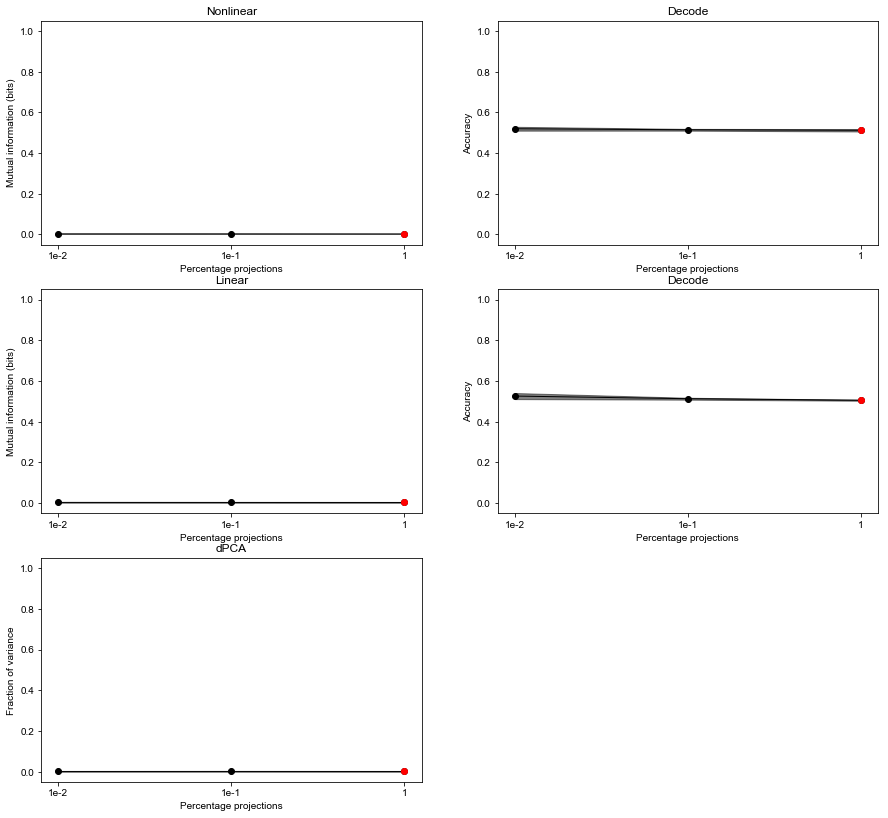

In [25]:
# Weight regularization

params = ['1e-2', '1e-1', '1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas_lambdaw='
for param in params[:2]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas'
for param in params[2:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 2, 3]
idx_paper = 2

plt.figure(figsize=(15,14))
plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

savepath = "/Users/michael/Documents/GitHub/multi-area/sims/revision/figs/"
plt.savefig(savepath + 'mi_lambdaw.pdf')


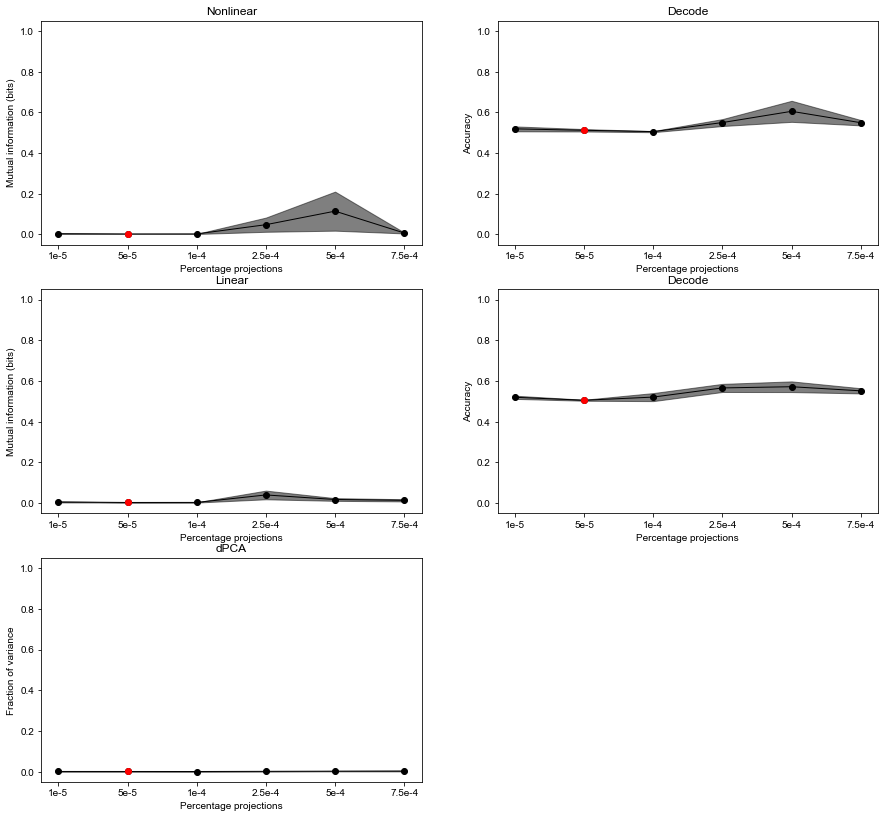

In [26]:
# Learning rate

params = ['1e-5', '5e-5', '1e-4', '2.5e-4', '5e-4', '7.5e-4']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas_lr='
for param in params[:1]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas'
for param in params[1:2]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas_lr='
for param in params[2:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 2, 3, 4, 5, 6]
idx_paper = 1
plt.figure(figsize=(15,14))

plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


savepath = savepath_figs
plt.savefig(savepath + 'mi_lr.pdf')


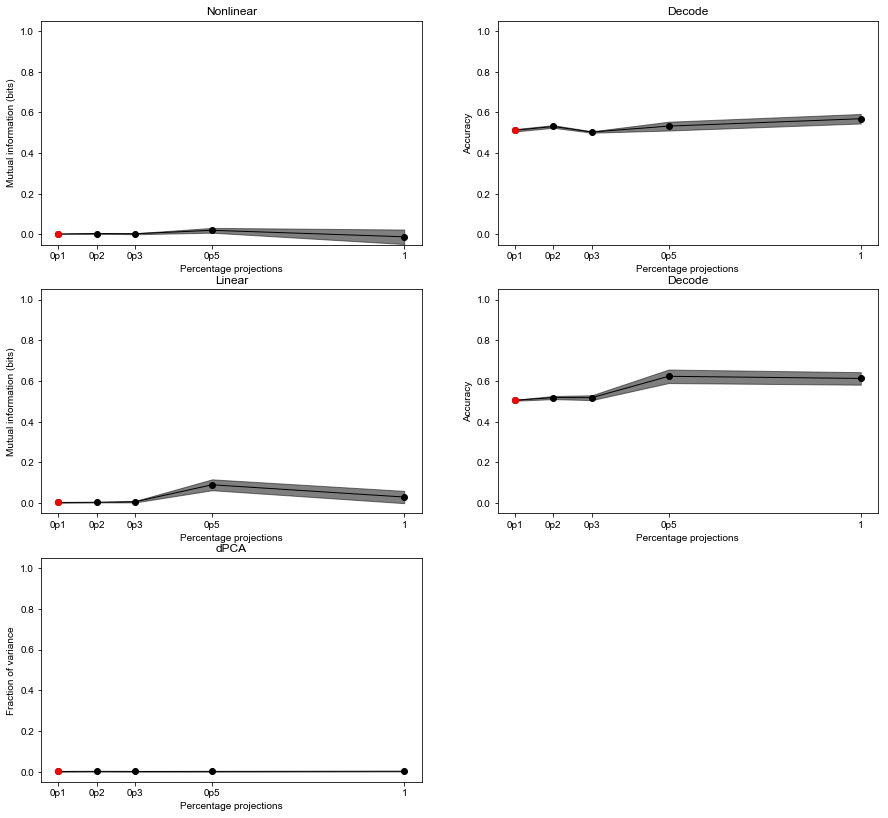

In [27]:
# Feedforward excitatory

params = ['0p1', '0p2', '0p3', '0p5', '1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas'
for param in params[:1]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas_ff='
for param in params[1:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 2, 3, 5, 10]
idx_paper = 0
plt.figure(figsize=(15,14))

plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

savepath = savepath_figs
plt.savefig(savepath + 'mi_ff.pdf')

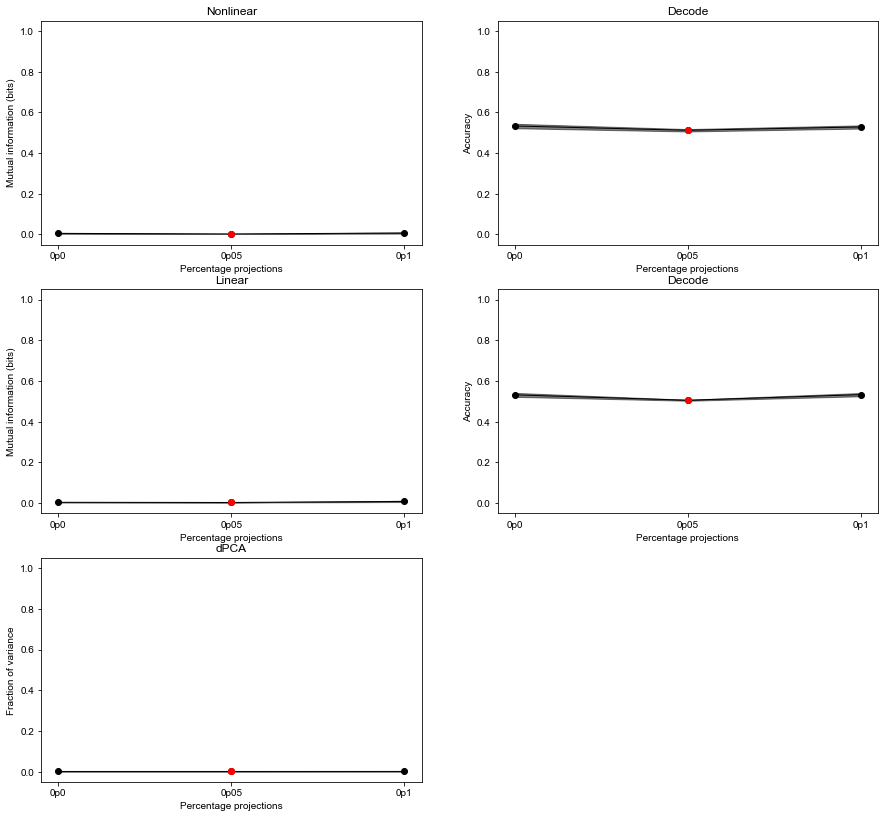

In [28]:
# Feedback - excitatory

params = ['0p0', '0p05', '0p1']

mi_color = []
acc_color = []
mi_color_linear = []
acc_color_linear = []
dpca_color = []

basepath = '2020-04-10_cb_simple_3areas_fb='
for param in params[:1]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))
    
basepath = '2020-04-10_cb_simple_3areas'
for param in params[1:2]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_3areas_fb='
for param in params[2:]:
    mi_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_color.npy'))
    acc_color.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color.npy'))
    mi_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_color_dropout_linear.npy'))
    acc_color_linear.append(np.load(loadpath_exemplar_mi + basepath + param + '_acc_color_dropout_linear.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.mean(mi_color, axis=1)
sem_mi_color = np.std(mi_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_mi_color_linear= np.mean(mi_color_linear, axis=1)
sem_mi_color_linear = np.std(mi_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color= np.mean(acc_color, axis=1)
sem_acc_color = np.std(acc_color, axis=1) / np.sqrt(len(mi_color[0]))
mean_acc_color_linear = np.mean(acc_color_linear, axis=1)
sem_acc_color_linear = np.std(acc_color_linear, axis=1) / np.sqrt(len(mi_color[0]))
mean_dpca_color= np.mean(dpca_color, axis=1)
sem_dpca_color = np.std(dpca_color, axis=1) / np.sqrt(len(mi_color[0]))

x = [1, 2, 3]
idx_paper = 1
plt.figure(figsize=(15,14))

plt.subplot(321)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(322)
y1 = mean_acc_color
yerr1 = sem_acc_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(323)
y1 = mean_mi_color_linear
yerr1 = sem_mi_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Percentage projections')
plt.title('Linear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')


plt.subplot(324)
y1 = mean_acc_color_linear
yerr1 = sem_acc_color_linear
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Accuracy')
plt.xlabel('Percentage projections')
plt.title('Decode')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

plt.subplot(325)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Percentage projections')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])
plt.plot(x[idx_paper], y1[idx_paper], linewidth=1, color='red', marker='o')
plt.fill_between(x[idx_paper], (y1 - yerr1)[idx_paper:idx_paper + 1], (y1 + yerr1)[idx_paper:idx_paper + 1], alpha=0.5, color='red')

savepath = savepath_figs
plt.savefig(savepath + 'mi_fb.pdf')

## Computational advantage

These cells constitute Figure 4.

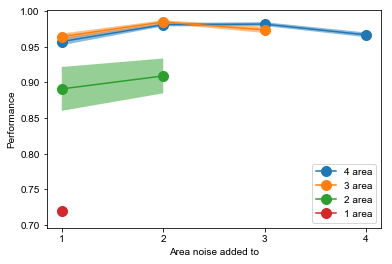

In [29]:
# Figure 4b - Robustness to areal noise

from cfg_mk import cfg_mk

loadpath = dirpath + 'sims/revision/scratch_data/'
cfg_mk['modelpath'] = '2020-04-10_cb_simple_4areas' 
base = cfg_mk['modelpath'] + '_'
hn_1 = np.load(loadpath + base + 'a1_0p1.npy')
hn_2 = np.load(loadpath + base + 'a2_0p1.npy')
hn_3 = np.load(loadpath + base + 'a3_0p1.npy')
hn_4 = np.load(loadpath + base + 'a4_0p1.npy')
hn_4 = np.delete(hn_4, 5, axis=0) # MK: removed network that did not train
hn_3 = np.delete(hn_3, 5, axis=0)
hn_2 = np.delete(hn_2, 5, axis=0)
hn_1 = np.delete(hn_1, 5, axis=0)
y3 = [np.mean(hn_1), np.mean(hn_2), np.mean(hn_3), np.mean(hn_4)]
yerr3 = np.array([np.std(hn_1), np.std(hn_2), np.std(hn_3), np.std(hn_4)]) / np.sqrt(7)
plt.plot(np.arange(4), y3, marker='.', markersize=20, label='4 area')
plt.fill_between(np.arange(4), y3 - yerr3, y3 + yerr3, alpha=0.5)

cfg_mk['modelpath'] = '2020-04-10_cb_simple_3areas' #should set this in cfg_mk
base = cfg_mk['modelpath'] + '_'
hn_1 = np.load(loadpath + base + 'a1_0p1.npy')
hn_2 = np.load(loadpath + base + 'a2_0p1.npy')
hn_3 = np.load(loadpath + base + 'a3_0p1.npy')
y3 = [np.mean(hn_1), np.mean(hn_2), np.mean(hn_3)]
yerr3 = np.array([np.std(hn_1), np.std(hn_2), np.std(hn_3)]) / np.sqrt(8)
plt.plot(np.arange(3), y3, marker='.', markersize=20, label='3 area')
plt.fill_between(np.arange(3), y3 - yerr3, y3 + yerr3, alpha=0.5)

cfg_mk['modelpath'] = '2020-04-10_cb_simple_2areas' 
base = cfg_mk['modelpath'] + '_'
hn_1 = np.load(loadpath + base + 'a1_0p1.npy')
hn_2 = np.load(loadpath + base + 'a2_0p1.npy')
y3 = [np.mean(hn_1), np.mean(hn_2)]
yerr3 = np.array([np.std(hn_1), np.std(hn_2)]) / np.sqrt(8)
plt.plot(np.arange(2), y3, marker='.', markersize=20, label='2 area')
plt.fill_between(np.arange(2), y3 - yerr3, y3 + yerr3, alpha=0.5)

cfg_mk['modelpath'] = '2020-04-10_cb_simple_1area' 
base = cfg_mk['modelpath'] + '_'
hn_1 = np.load(loadpath + base + 'a1_0p1.npy')
y3 = [np.mean(hn_1)]
yerr3 = np.array([np.std(hn_1)]) / np.sqrt(8)
plt.plot(np.arange(1), y3, marker='.', markersize=20, label='1 area')
plt.fill_between(np.arange(1), y3 - yerr3, y3 + yerr3, alpha=0.5)

plt.xticks(np.arange(4), ['1', '2', '3', '4'])  # Set text labels.
plt.xlabel('Area noise added to')
plt.ylabel('Performance')
plt.legend()

savepath = "/Users/michael/Documents/GitHub/multi-area/sims/revision/figs/"
# plt.savefig(savepath + 'perf_summary_indiv-area.pdf')

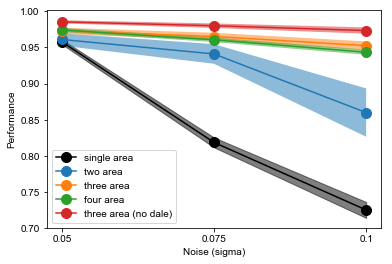

In [30]:
# Figure 4a - Overall robustness to noise 

loadpath = dirpath + 'sims/revision/scratch_data/'
base = '2020-04-10_cb_simple_'
hn_1 = np.load(loadpath + base + '1area_0p1noise.npy')
mn_1 = np.load(loadpath + base + '1area_0p075noise.npy')
ln_1 = np.load(loadpath + base + '1area_0p05noise.npy')
hn_2 = np.load(loadpath + base + '2areas_0p1noise.npy')
mn_2 = np.load(loadpath + base + '2areas_0p075noise.npy')
ln_2 = np.load(loadpath + base + '2areas_0p05noise.npy')
hn_3 = np.load(loadpath + base + '3areas_0p1noise.npy')
mn_3 = np.load(loadpath + base + '3areas_0p075noise.npy')
ln_3 = np.load(loadpath + base + '3areas_0p05noise.npy')
hn_4 = np.load(loadpath + base + '4areas_0p1noise.npy')
mn_4 = np.load(loadpath + base + '4areas_0p075noise.npy')
ln_4 = np.load(loadpath + base + '4areas_0p05noise.npy')
hn_4 = np.delete(hn_4, 5) # this net did not train
mn_4 = np.delete(mn_4, 5)
ln_4 = np.delete(ln_4, 5)
hn_nd3 = np.load(loadpath + base + '3areas_nodale_ff=0p1_0p1noise.npy')
mn_nd3 = np.load(loadpath + base + '3areas_nodale_ff=0p1_0p075noise.npy')
ln_nd3 = np.load(loadpath + base + '3areas_nodale_ff=0p1_0p05noise.npy')
x = np.load(loadpath + base + '1area_uconds.npy')

y1 = [np.mean(ln_1), np.mean(mn_1), np.mean(hn_1)]  # intentionally swapped due to saving bug #HACK
yerr1 = np.array([np.std(ln_1), np.std(mn_1), np.std(hn_1)]) / np.sqrt(8)
plt.plot(y1, marker='.', markersize=20, label='single area', color='black')
plt.fill_between(np.arange(3), y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')

y2 = [np.mean(ln_2), np.mean(mn_2), np.mean(hn_2)]
yerr2 = np.array([np.std(ln_2), np.std(mn_2), np.std(hn_2)]) / np.sqrt(8)
plt.plot(y2, marker='.', markersize=20, label='two area')
plt.fill_between(np.arange(3), y2 - yerr2, y2 + yerr2, alpha=0.5)

y3 = [np.mean(ln_3), np.mean(mn_3), np.mean(hn_3)]
yerr3 = np.array([np.std(ln_3), np.std(mn_3), np.std(hn_3)]) / np.sqrt(8)
plt.plot(y3, marker='.', markersize=20, label='three area')
plt.fill_between(np.arange(3), y3 - yerr3, y3 + yerr3, alpha=0.5)

y4 = [np.mean(ln_4), np.mean(mn_4), np.mean(hn_4)]
yerr4 = np.array([np.std(ln_4), np.std(mn_4), np.std(hn_4)]) / np.sqrt(len(ln_4))
plt.plot(y4, marker='.', markersize=20, label='four area')
plt.fill_between(np.arange(3), y4 - yerr4, y4 + yerr4, alpha=0.5)

y5 = [np.mean(ln_nd3), np.mean(mn_nd3), np.mean(hn_nd3)]
yerr5 = np.array([np.std(ln_nd3), np.std(mn_nd3), np.std(hn_nd3)]) / np.sqrt(8)
plt.plot(y5, marker='.', markersize=20, label='three area (no dale)')
plt.fill_between(np.arange(3), y5 - yerr5, y5 + yerr5, alpha=0.5)

plt.xticks(np.arange(3), ['0.05', '0.075', '0.1'])  # Set text labels.
plt.xlabel('Noise (sigma)')
plt.ylabel('Performance')
plt.legend()

savepath = "/Users/michael/Documents/GitHub/multi-area/sims/revision/figs/"
plt.savefig(savepath + 'perf_summary.pdf')


## Dimensionality

To run for any area, uncomment the desired line, i.e `cfg_mk['modelpath'] = '2020-04-10_cb_simple_4areas`

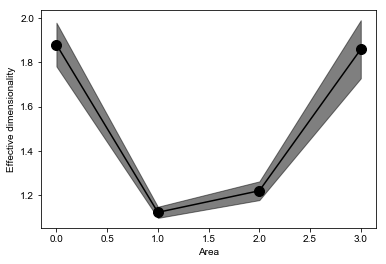

In [31]:
# Figure 4b - dimensionality per area

import os

# can generate for any number of areas by uncommenting the appropriate modelpath
cfg_mk['suffix'] = ''
# cfg_mk['modelpath'] = '2020-04-10_cb_simple_3areas'
cfg_mk['modelpath'] = '2020-04-10_cb_simple_4areas'
# cfg_mk['modelpath'] = '2020-04-10_cb_simple_2areas'
# cfg_mk['modelpath'] = '2020-04-10_cb_simple_1area'


data_save_path = dirpath + "sims/revision/scratch_data"
os.chdir(data_save_path)
dims = np.load(cfg_mk['modelpath'] + cfg_mk['suffix'] + '_dims' + '.npy')

x = np.arange(dims.shape[1])
y1 = np.mean(dims, axis=0)
# plt.plot(x, y1, marker='o', color='black')
yerr1 = np.array(np.std(dims, axis=0)) / np.sqrt(dims.shape[0])
plt.plot(y1, marker='.', markersize=20, label='single area', color='black')
plt.fill_between(np.arange(dims.shape[1]), y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')

if dims.shape[1] == 0:
    plt.xticks(x, ['Area 1'])
if dims.shape[1] == 1:
    plt.xticks(x, ['Area 1', 'Area 2'])
if dims.shape[1] == 2:
    plt.xticks(x, ['Area 1', 'Area 2', 'Area 3'])
if dims.shape[1] == 3:
    plt.xticks(x, ['Area 1', 'Area 2', 'Area 3', 'Area 4'])

plt.ylabel('Effective dimensionality')
plt.xlabel('Area')

savepath = dirpath + "sims/revision/figs/"
plt.savefig(savepath + cfg_mk['modelpath'] + cfg_mk['suffix'] + '_dims.pdf')


## Output weights

Overlap metric:
0.7764308771869783


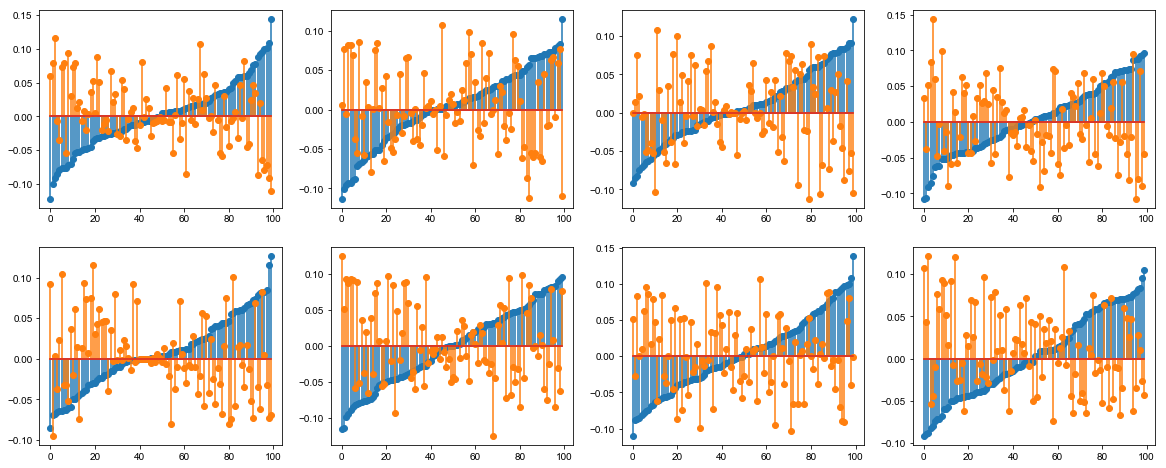

In [32]:
# nodale

basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.0027019680693676773


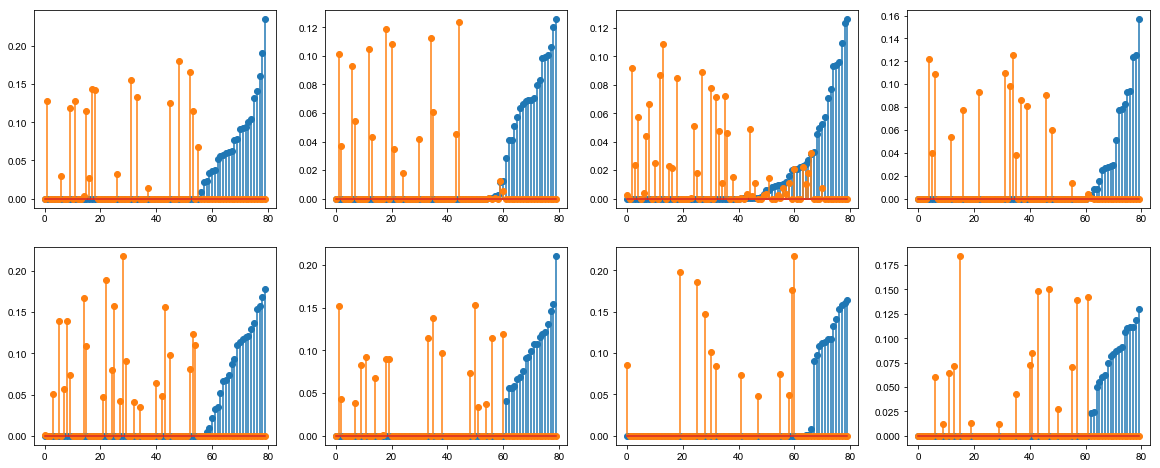

In [33]:
# Dale law - 3area RNN

basepath = '2020-04-10_cb_simple_3areas_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 160:240]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 160:240])
    axs[i].stem(rnn.Wout[1, 160:240][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

Overlap metric:
0.29466659038751203


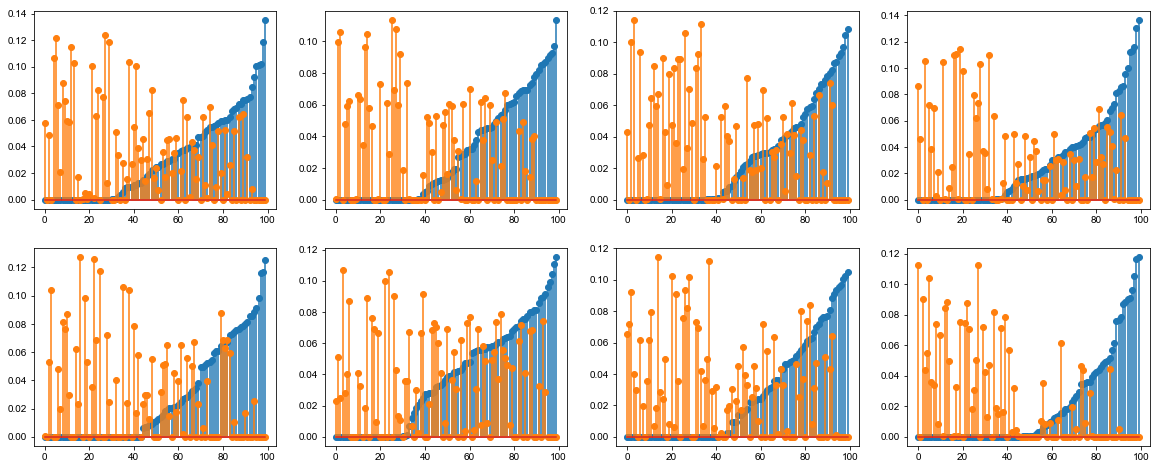

In [34]:
# nodale, with constrain on output weights
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1_outputpos_seed='
fig, axs = plt.subplots(2,4, figsize = (20,8))
axs = axs.ravel()
sum_overlap = 0
sum_left = 0
for i in range(8):
    rnn = retrieve_object(basepath + str(i) + '_rnn.p', loadpath_output)
    axs[i].stem(np.sort(rnn.Wout[0, 200:300]), 'C0')
    id_sort = np.argsort(rnn.Wout[0, 200:300])
    axs[i].stem(rnn.Wout[1, 200:300][id_sort], 'C1-', markerfmt='C1o')
    sum_overlap = sum_overlap + np.abs(rnn.Wout[0, :]).dot(np.abs(rnn.Wout[1, :]))
    sum_left = sum_left + np.sum(rnn.Wout[0, :] ** 2)
    
print('Overlap metric:')
print(sum_overlap/sum_left)

## dpca inputs on context, color and direction axis

Run these in order. For Area 1 values, set `Area3 = False`, for Area 3, set `Area3=True`. Uncomment the corresponding line, to run for a single-area RNN, only excitatory units, and No Dale. This constitutes Figure 5, and Figure S8, Figure S10

In [35]:
area3 = False
# psths = retrieve_object('psths_dir_scol_nonoise.p', loadpath_data)

# three area - Figure 5
psths = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
rnn = retrieve_object('rnn.p', loadpath_exemplar_data)
idx1 = np.hstack((np.arange(80), np.arange(240, 260))) # excitatory and inhibitory
# # idx1 = np.arange(80) # only excitatory units - Figure S10

# # No dale - Figure S8, bottom
# rnn = retrieve_object('rnn_nodale.p', loadpath_data)
# psths = retrieve_object('psths_nodale_dir_scol.p', loadpath_data)
# idx1 = np.arange(100)

# # single area - Figure S8, top
# rnn = retrieve_object('rnn_1area.p', loadpath_data)
# psths = retrieve_object('psths_1area_dir_scol.p', loadpath_data)
# idx1 = np.arange(300)

if (area3):
    idx1 = np.hstack((np.arange(160,240), np.arange(280, 300))) # area 3
W23 = rnn.Wrec[160:240, 80:160]


num_cond1 = 2
num_cond2 = len(psths) // num_cond1
X = np.zeros((len(idx1), 210, num_cond1, num_cond2))
for i in range(num_cond1):
    for j in range(num_cond2):
        X[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx1, 90:300]

dpca_output = dPCA.dPCA(labels='tdc', join={'td': ['d', 'td'], 'tc': ['c', 'tc'], 'tdc': ['dc', 'tdc']}, n_components=1)
Z = dpca_output.fit_transform(X)
cvar, dvar, xvar = dpca_output.calculate_variance(X)

def plot_inps_axes(key = 'd'):
    for i in range(len(psths)):        
        inps = psths[i]['u_psth']
        if area3:
            proj_inps = W23.dot(psths[i]['psth'][80:160, 90:300])
            proj_inps = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1)[:80], proj_inps)
        else:
            proj_inps = rnn.Win.dot(inps)[idx1, 90:300]
            proj_inps = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1), proj_inps)

        act = psths[i]['psth']
        proj_act = act[idx1, 90:300]
        proj_act = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1), proj_act)
        
        if i == 0:
            plt.plot(proj_inps, 'r--', alpha=0.5)
            plt.plot(proj_act, 'r--', linewidth=2)
        if i == 1:
            plt.plot(proj_inps, 'g--', alpha=0.5)
            plt.plot(proj_act, 'g--', linewidth=2)
        if i == 2:
            plt.plot(proj_inps, 'r', alpha=0.5)
            plt.plot(proj_act, 'r',linewidth=2)
        if i == 3:
            plt.plot(proj_inps, 'g', alpha = 0.5)  
            plt.plot(proj_act, 'g', linewidth=2)  
    
    savepath = savepath_figs
    plt.ylabel('Projections (au)')
    plt.xlabel('Time')
    plt.xticks([0, 60], ['Targ on', 'Check on'])
    suffix_area = ''
    if area3:
        suffix_area = '_a3'
    plt.savefig(savepath + 'dpca_inps_' + key + suffix_area + '.pdf')
    
    

tdc variance: 0.2246040069465442
td variance: 0.3066025897081389
t variance: 0.3854919389925039
tc variance: 0.062498214246521265


Text(0.5,1,'context')

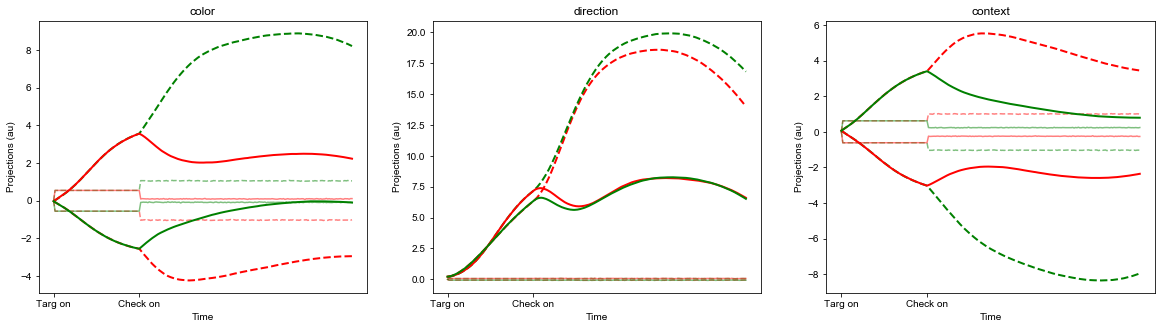

In [36]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plot_inps_axes(key='tc')
plt.title('color')
plt.subplot(132)
plot_inps_axes(key='td')
plt.title('direction')
plt.subplot(133)
plot_inps_axes(key='tdc')
plt.title('context')


Text(0.5,1,'context')

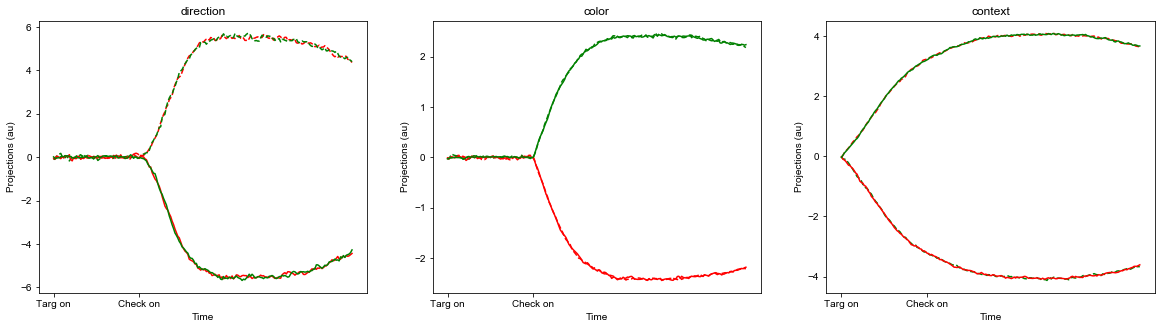

In [37]:
# Figure 5b - the demixed components

plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.plot(Z['td'][0, :, 0, 0], 'r--')
plt.plot(Z['td'][0, :, 0, 1], 'g--')
plt.plot(Z['td'][0, :, 1, 0], 'r')
plt.plot(Z['td'][0, :, 1, 1], 'g')
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('direction')

plt.subplot(132)
plt.plot(Z['tc'][0, :, 0, 0], 'r--')
plt.plot(Z['tc'][0, :, 0, 1], 'g--')
plt.plot(Z['tc'][0, :, 1, 0], 'r')
plt.plot(Z['tc'][0, :, 1, 1], 'g')
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('color')

plt.subplot(133)
plt.plot(Z['tdc'][0, :, 0, 0], 'r--')
plt.plot(Z['tdc'][0, :, 0, 1], 'g--')
plt.plot(Z['tdc'][0, :, 1, 0], 'r')
plt.plot(Z['tdc'][0, :, 1, 1], 'g')
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('context')


## context and coherence

Note: To run this is requires `psths_lrs_coh.p` (which is ~1.5Gb) to be in `loadpath_exemplar_data`. You can generate the data in Revision_exemplar.ipynb (saving psth related data cells -- this takes ~30minutes), or download the file directly https://drive.google.com/file/d/11txjrpb28qslFMozFBuVvEblmORZzuds/view?usp=sharing.

Text(0.5,1,'signed direction')

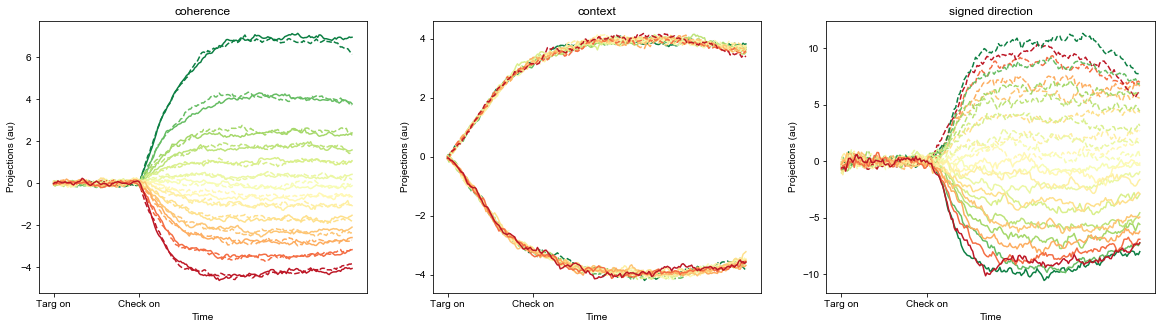

In [38]:
# Figure 5b

psths = retrieve_object('psths_lrs_coh.p', loadpath_exemplar_data)
idx1 = np.hstack((np.arange(80), np.arange(240, 260))) # excitatory and inhibitory

# psths = retrieve_object('psths_lrs_coh_nonoise.p', loadpath_data)

import matplotlib.cm as cm
from __future__ import division
def coh_r(cb_cond):
    return 2*(cb_cond / 225) - 1

def plot_linestyle(*args):
    linestyle = '-'
    for left_right, cond in args:
        if left_right == -1 and cond > 112 or left_right == 1 and cond < 112:
            linestyle = '--'
        else:
            linestyle = '-'
    return linestyle


def plot_color(*args):
    cond_color = (0, 0, 0, 1)       # cm returns (red, green, blue, alpha)
    for sortable, value in args:
        cond_color  = cm.RdYlGn(1 - (1 + coh_r(value)) / 2)
    return cond_color

# dpca
num_cond1 = 2
num_cond2 = len(psths) // num_cond1
X = np.zeros((len(idx1), 210, num_cond1, num_cond2))
for i in range(num_cond1):
    for j in range(num_cond2):
        X[:, :, i, j] = psths[i * num_cond2 + j]['psth'][idx1, 90:300]
dpca_input = dPCA.dPCA(labels='txc', join={'tx': ['x', 'tx'], 'tc': ['c', 'tc'], 'txc': ['xc', 'txc']}, n_components=1)
Z = dpca_input.fit_transform(X)

# Plotting
plt.figure(figsize=(20, 5))
plt.subplot(131)
for i in range(2):
    for j in range(14):
        cond_color  = plot_color(psths[i*14 + j]['cond'])
        cond_ls     = plot_linestyle(psths[i*14+j]['cond'])
        plt.plot(Z['tc'][0, :, i, j], color=cond_color, linestyle=cond_ls)
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('coherence')


plt.subplot(132)
for i in range(2):
    for j in range(14):
        cond_color  = plot_color(psths[i*14 + j]['cond'])
        cond_ls     = plot_linestyle(psths[i*14+j]['cond'])
        plt.plot(Z['tx'][0, :, i, j], color=cond_color, linestyle=cond_ls)
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('context')

plt.subplot(133)
for i in range(2):
    for j in range(14):
        cond_color  = plot_color(psths[i*14 + j]['cond'])
        cond_ls     = plot_linestyle(psths[i*14+j]['cond'])
        plt.plot(Z['txc'][0, :, i, j], color=cond_color, linestyle=cond_ls)
plt.ylabel('Projections (au)')
plt.xlabel('Time')
plt.xticks([0, 60], ['Targ on', 'Check on'])
plt.title('signed direction')
    

[[1.         0.9272305  0.13882618 0.99521416]
 [0.9272305  1.         0.06554021 0.91484591]
 [0.13882618 0.06554021 1.         0.23390609]
 [0.99521416 0.91484591 0.23390609 1.        ]]


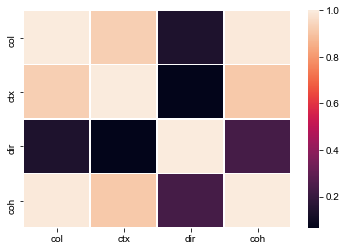

In [39]:
# Figure 5e

def plot_axes_overlap(col_axs, ctx_axs, dir_axs, coh_axs):
    list_axs = [col_axs, ctx_axs, dir_axs, coh_axs]
    overlap = np.zeros((4,4))
    for i,ax1 in enumerate(list_axs):
        for j,ax2 in enumerate(list_axs):
            overlap[i,j] = np.abs(ax1.dot(ax2))

    import seaborn as sns
    ax = sns.heatmap(overlap, linewidth=0.5)
    plt.xticks([0.5, 1.5, 2.5, 3.5], ['col', 'ctx', 'dir', 'coh']) 
    plt.yticks([0.5, 1.5, 2.5, 3.5], ['col', 'ctx', 'dir', 'coh']) 
    print(overlap)
    
col_axs = dpca_output.P['tc'] #+ dpca.P['tc']
ctx_axs = dpca_input.P['tx'] #+ dpca.P['tx']
dir_axs = dpca_output.P['td'] #+ dpca.P['txc']
coh_axs = dpca_input.P['tc'] #+ dpca.P['tc']

col_axs = (col_axs/np.sqrt(np.sum(col_axs ** 2))).reshape(-1)
ctx_axs = (ctx_axs/np.sqrt(np.sum(ctx_axs ** 2))).reshape(-1)
dir_axs = (dir_axs/np.sqrt(np.sum(dir_axs ** 2))).reshape(-1)
coh_axs = (coh_axs/np.sqrt(np.sum(coh_axs ** 2))).reshape(-1)
plot_axes_overlap(col_axs, ctx_axs, dir_axs, coh_axs)

## axis overlap

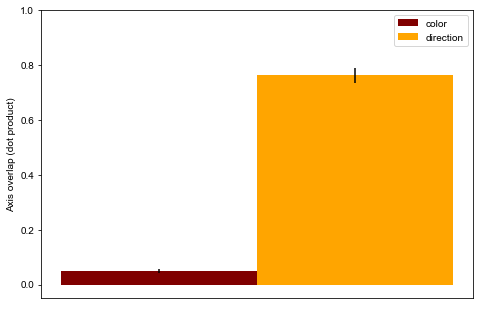

In [40]:
# Figure 5g

loadpath = loadpath_exemplar_dpca
ax_overlap = np.load(loadpath + 'ax_overlap_dpca.npy')
ax_overlap = np.abs(ax_overlap) #** 2

data = np.vstack((np.mean(ax_overlap, axis=(0,1))[0], np.mean(ax_overlap, axis=(0,1))[1]))
sem = np.vstack((np.std(ax_overlap, axis=(0,1))[0], np.std(ax_overlap, axis=(0,1))[1]))/np.sqrt(40)

X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'maroon', width = 0.25, yerr=sem[0], label='color')
ax.bar(X + 0.25, data[1], color = 'orange', width = 0.25, yerr=sem[1], label='direction')
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.legend()

plt.ylabel('Axis overlap (dot product)')
plt.ylim(-0.05, 1)
plt.xticks([])

savepath = savepath_figs
plt.savefig(savepath + 'ax_overlap_dpca' + '.pdf')

## plotting tdr

In [41]:
# Figure S9

psths = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
rnn = retrieve_object('rnn.p', loadpath_data)
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))

def plot_inps_axes_tdr(v):
    v = v/np.sqrt(np.sum(v ** 2))
    for i in range(4):        
        inps = psths[i]['u_psth']
        proj_inps = rnn.Win.dot(inps)[idx1, 90:300]
        proj_inps = np.dot(v, proj_inps)
        act = psths[i]['psth']
        proj_act = act[idx1, 90:300]
        proj_act = np.dot(v, proj_act)
        
        if i == 0:
            plt.plot(proj_inps, 'r--', alpha=0.5)
            plt.plot(proj_act, 'r--', linewidth=2)
        if i == 1:
            plt.plot(proj_inps, 'g--', alpha=0.5)
            plt.plot(proj_act, 'g--', linewidth=2)
        if i == 2:
            plt.plot(proj_inps, 'r', alpha=0.5)
            plt.plot(proj_act, 'r',linewidth=2)
        if i == 3:
            plt.plot(proj_inps, 'g', alpha = 0.5)  
            plt.plot(proj_act, 'g', linewidth=2)  
    
    savepath = savepath_figs
    plt.ylabel('Projections (au)')
    plt.xlabel('Time')
    plt.xticks([0, 60], ['Targ on', 'Check on'])
#     plt.savefig(savepath + 'dpca_inps_' + key + '.pdf')

Text(0.5,1,'context')

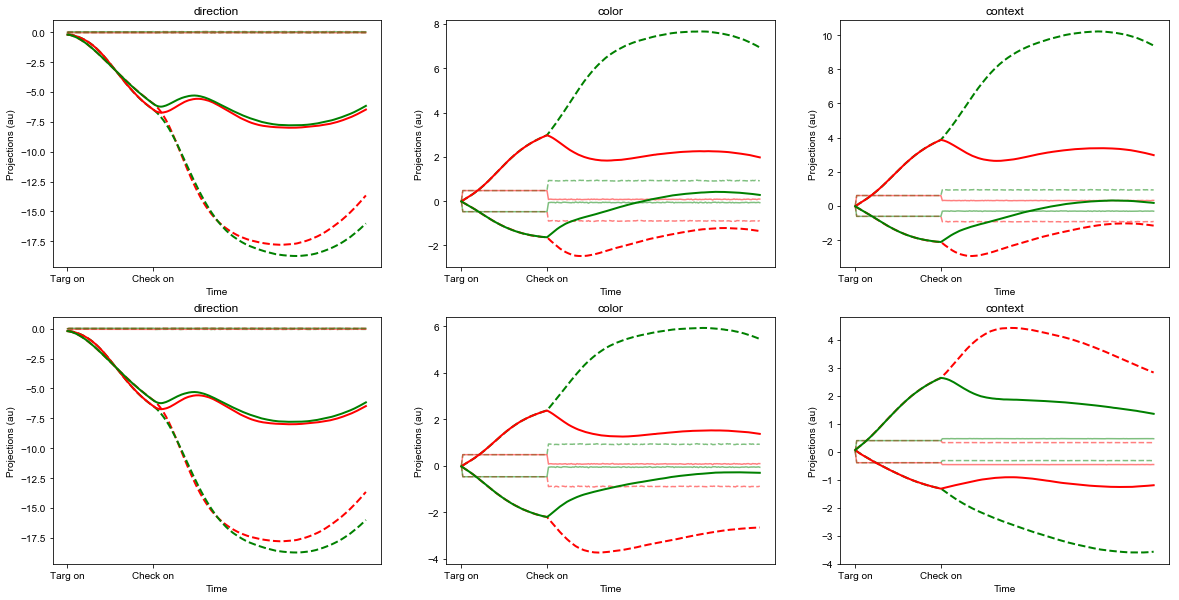

In [42]:
betas = retrieve_object('betas.p', loadpath_data)
max_ind1 = retrieve_object('max_indices_l1.p', loadpath_data)
# 0: direction, 1: selected color: 2: context
# betas has shape (parameter, neuron, time)
# max_ind1 is a dictionary where you get the max index for each parameter, i.e max_ind[0] is direction max index

plt.figure(figsize=(20,10))
plt.subplot(231)
plot_inps_axes_tdr(betas[0, idx1, max_ind1[0]])
plt.title('direction')
plt.subplot(232)
plot_inps_axes_tdr(betas[1, idx1, max_ind1[1]])
plt.title('color')
plt.subplot(233)
plot_inps_axes_tdr(betas[2, idx1, max_ind1[2]])
plt.title('context')

# orthonormalized
beta_max = np.array([betas[0, idx1, max_ind1[0]], betas[1, idx1, max_ind1[1]], betas[2, idx1, max_ind1[2]]])
q, r = np.linalg.qr(beta_max.T)
plt.subplot(234)
plot_inps_axes_tdr(q[:, 0])
plt.title('direction')
plt.subplot(235)
plot_inps_axes_tdr(q[:, 1])
plt.title('color')
plt.subplot(236)
plot_inps_axes_tdr(q[:, 2])
plt.title('context')


## single rnn sweeps
These results constitute Figure S6. These sweeps have color, direction, context saved (see commented lines for how to load)

(-0.05, 1.05)

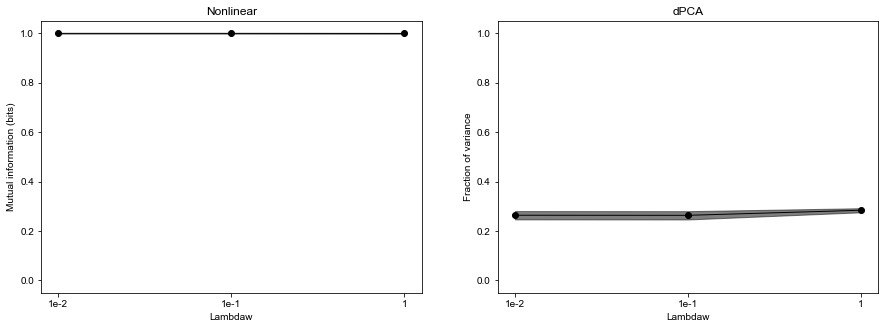

In [43]:
import numpy as np
import pdb
import matplotlib.pyplot as plt

basepath = '2020-04-10_cb_simple_1area_lambdaw='
params = ['1e-2', '1e-1', '1']

mi_color = []
dpca_color = []

basepath = '2020-04-10_cb_simple_1area_lambdaw='
for param in params[:2]:
    mi_color.append(np.load(loadpath_mi + basepath + param + '_color.npy'))
#     mi_color.append(np.load(loadpath_mi + basepath + param + '_context.npy'))
#     mi_color.append(np.load(loadpath_mi + basepath + param + '_direction.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_1area'
for param in params[2:]:
    mi_color.append(np.load(loadpath_mi + basepath + '_color.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

mean_mi_color = np.array([sum(lst) / len(lst) for lst in mi_color])
sem_mi_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in mi_color])
mean_dpca_color = np.array([sum(lst) / len(lst) for lst in dpca_color])
sem_dpca_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in dpca_color])

x = [1, 2, 3]
plt.figure(figsize=(15,5))
plt.subplot(121)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Lambdaw')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

x = [1, 2, 3]
plt.subplot(122)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Lambdaw')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])


(-0.05, 1.05)

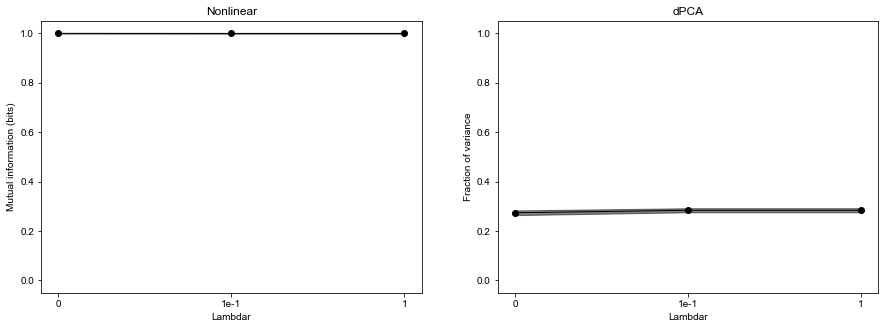

In [44]:
import numpy as np
import pdb
import matplotlib.pyplot as plt

params = ['0', '1e-1', '1']

mi_color = []
dpca_color = []

basepath = '2020-04-10_cb_simple_1area_lambdar='
for param in params[2:3]:
    mi_color.append(np.load(loadpath_mi + basepath + param + '_context.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_1area'
for param in params[:2]:
    mi_color.append(np.load(loadpath_mi + basepath + '_color.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

mean_mi_color = np.array([sum(lst) / len(lst) for lst in mi_color])
sem_mi_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in mi_color])
mean_dpca_color = np.array([sum(lst) / len(lst) for lst in dpca_color])
sem_dpca_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in dpca_color])

x = [1, 2, 3]
plt.figure(figsize=(15,5))
plt.subplot(121)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Lambdar')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

x = [1, 2, 3]
plt.subplot(122)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Lambdar')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])


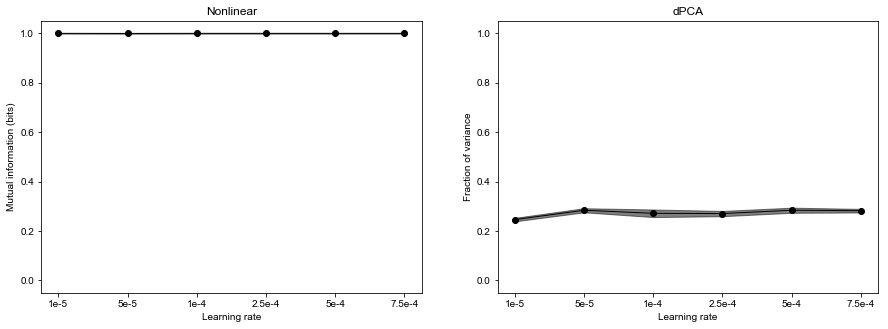

In [45]:
params = ['1e-5', '5e-5', '1e-4', '2.5e-4', '5e-4', '7.5e-4']

mi_color = []
dpca_color = []

basepath = '2020-04-10_cb_simple_1area_lr='
for param in params[:1]:
    mi_color.append(np.load(loadpath_mi + basepath + param + '_color.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_1area'
for param in params[1:2]:
    mi_color.append(np.load(loadpath_mi + basepath + '_color.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))

basepath = '2020-04-10_cb_simple_1area_lr='
for param in params[2:]:
    mi_color.append(np.load(loadpath_mi + basepath + param + '_color.npy'))
    dpca_color.append(np.load(loadpath_dpca + basepath + param + '_dpca_color.npy'))

mean_mi_color = np.array([sum(lst) / len(lst) for lst in mi_color])
sem_mi_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in mi_color])
mean_dpca_color = np.array([sum(lst) / len(lst) for lst in dpca_color])
sem_dpca_color = np.array([np.std(lst)/np.sqrt(len(lst)) for lst in dpca_color])

x = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(15,5))
plt.subplot(121)
y1 = mean_mi_color
yerr1 = sem_mi_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Mutual information (bits)')
plt.xlabel('Learning rate')
plt.title('Nonlinear')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])

plt.subplot(122)
y1 = mean_dpca_color
yerr1 = sem_dpca_color
plt.plot(x, y1, linewidth=1, color='black', marker='o')
plt.fill_between(x, y1 - yerr1, y1 + yerr1, alpha=0.5, color='black')
plt.ylabel('Fraction of variance')
plt.xlabel('Learning rate')
plt.title('dPCA')
plt.xticks(x, params)
plt.ylim([-0.05, 1.05])


savepath = savepath_figs
# plt.savefig(savepath + 'single_area' + '.pdf')

## plotting behavior

Text(0.5,1,'Psychometric function for RNN checkerboard task')

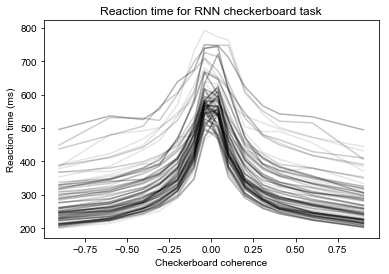

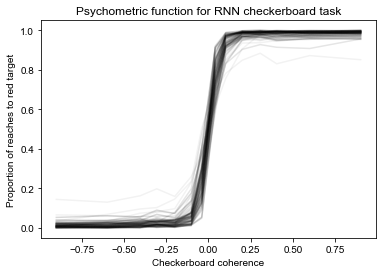

In [46]:
# Plotting RNNs from initial submission sorted by feedback (Reviewer Response Figure)

cohs_store = np.load(loadpath_data + 'cohs_store.npy')
red_rates_store = np.load(loadpath_data + 'red_rates_store.npy')
rts_cond_store = np.load(loadpath_data + 'rts_cond_store.npy')
all_files = retrieve_object('three_rnn_filenames.p', loadpath_data)

seeds = ['0', '1', '2', '3', '4', '5', '6', '7']
fbs = ['0p0', '0p05', '0p1']
ffs = ['0p1', '0p2', '0p3']

cohs_organized = np.zeros((14, len(ffs), len(fbs), len(seeds)))
rts_organized = np.zeros((14, len(ffs), len(fbs), len(seeds)))
red_rates_organized = np.zeros((14, len(ffs), len(fbs), len(seeds)))

# reorganize the indices
for i, this_file in enumerate(all_files):
    for s, seed in enumerate(seeds):
        for b, fb in enumerate(fbs):
            for f, ff in enumerate(ffs):
                if this_file == '2018-08-29_cb_3areas_ff' + ff + '_fb' + fb + '_seed=' + seed + '.pkl':
                    cohs_organized[:, f, b, s] = cohs_store[:, i]
                    rts_organized[:, f, b, s] = rts_cond_store[:, i]
                    red_rates_organized[:, f, b, s] = red_rates_store[:, i]

plt.figure()
for s, seed in enumerate(seeds):
    for b, fb in enumerate(fbs):
        for f, ff in enumerate(ffs):
            plt.plot(cohs_organized[:, f, b, s], rts_organized[:, f, b, s], 'black', alpha=0.1 *(f+1)) #, marker='.', markersize=2
#             plt.plot(np.mean(cohs_store, axis=1), np.mean(rts_cond_store, axis =1), 'k')

plt.xlabel('Checkerboard coherence')
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for RNN checkerboard task')

plt.figure()
for s, seed in enumerate(seeds):
    for b, fb in enumerate(fbs):
        for f, ff in enumerate(ffs):
            plt.plot(cohs_organized[:, f, b, s], red_rates_organized[:, f, b, s], 'black', alpha=0.05 *(f+1)) #, marker='.', markersize=2
#             plt.plot(np.mean(cohs_store, axis=1), np.mean(red_rates_store, axis =1), 'k')

plt.xlabel('Checkerboard coherence')
plt.ylabel('Proportion of reaches to red target')
plt.title('Psychometric function for RNN checkerboard task')

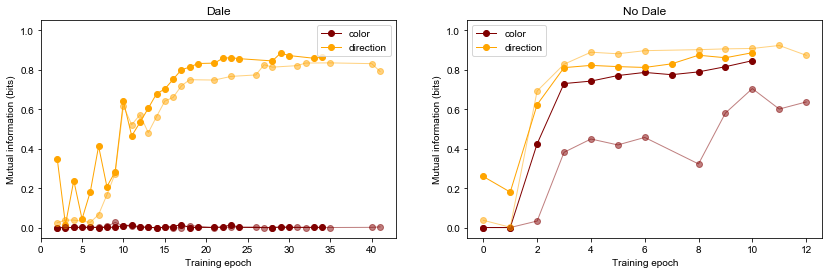

In [47]:
# Figure S6 - MI through training

mi_color= []
mi_color_dir= []
basepath = '2020-04-10_cb_simple_3areas'
mi_color.append(np.load(loadpath_mi + basepath + '_color_epoch_seed7.npy'))
mi_color_dir.append(np.load(loadpath_mi + basepath + '_direction_epoch_seed7.npy'))

# x = np.arange(30)
x = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 28, 29, 30, 33, 34]
plt.figure(figsize=(14,4))
plt.subplot(121)
y1 = np.array(mi_color).reshape(-1)
y2 = np.array(mi_color_dir).reshape(-1)
plt.plot(x[3:], y1[3:], linewidth=1, color='maroon', marker='o', label='color')
plt.plot(x[3:], y2[3:], linewidth=1, color='orange', marker='o', label='direction')
plt.legend()
plt.ylabel('Mutual information (bits)')
plt.xlabel('Training epoch')
plt.title('Dale')
plt.ylim([-0.05, 1.05])

mi_color = []
mi_color_dir = []
basepath = '2020-04-10_cb_simple_3areas'
mi_color.append(np.load(loadpath_mi + basepath + '_color_epoch_seed0.npy'))
mi_color_dir.append(np.load(loadpath_mi + basepath + '_direction_epoch_seed0.npy'))

# x = np.arange(2, 28)
x = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 23, 26, 27, 28, 31, 32, 35, 40, 41]
y1 = np.array(mi_color).reshape(-1)
y2 = np.array(mi_color_dir).reshape(-1)
plt.plot(x, y1, linewidth=1, color='maroon', marker='o', alpha=0.5)
plt.plot(x, y2, linewidth=1, color='orange', marker='o', alpha=0.5)
plt.ylabel('Mutual information (bits)')
plt.xlabel('Training epoch')
plt.title('Dale')
plt.ylim([-0.05, 1.05])

mi_color = []
mi_color_dir = []
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1'
mi_color.append(np.load(loadpath_mi + basepath + '_color_epoch_seed7.npy'))
mi_color_dir.append(np.load(loadpath_mi + basepath + '_direction_epoch_seed7.npy'))

x = np.arange(11)
plt.subplot(122)
y1 = np.array(mi_color).reshape(-1)
y2 = np.array(mi_color_dir).reshape(-1)
plt.plot(x, y1, linewidth=1, color='maroon', marker='o', label='color')
plt.plot(x, y2, linewidth=1, color='orange', marker='o', label='direction')
plt.legend()
plt.ylabel('Mutual information (bits)')
plt.xlabel('Training epoch')
plt.title('No Dale')
plt.ylim([-0.05, 1.05])

mi_color = []
mi_color_dir = []
basepath = '2020-04-10_cb_simple_3areas_nodale_ff=0p1'
mi_color.append(np.load(loadpath_mi + basepath + '_color_epoch_seed0.npy'))
mi_color_dir.append(np.load(loadpath_mi + basepath + '_direction_epoch_seed0.npy'))

# x = np.arange(12)
x = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]
y1 = np.array(mi_color).reshape(-1)
y2 = np.array(mi_color_dir).reshape(-1)
plt.plot(x, y1, linewidth=1, color='maroon', marker='o', alpha=0.5)
plt.plot(x, y2, linewidth=1, color='orange', marker='o', alpha=0.5)
plt.ylabel('Mutual information (bits)')
plt.xlabel('Training epoch')
plt.title('No Dale')
plt.ylim([-0.05, 1.05])

plt.savefig(savepath_exemplar_figs + 'mi_training_combined.pdf')


## single area dpca

[0.28403383 0.25541094 0.36077762]


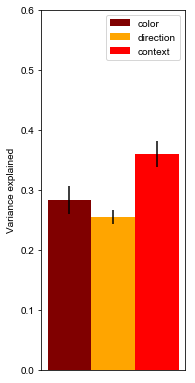

In [48]:
# Figure S2d

dpca_single = []

basepath = '2020-04-10_cb_simple_1area'
dpca_single.append(np.load(loadpath_dpca + basepath + '_dpca_color.npy'))
dpca_single.append(np.load(loadpath_dpca + basepath + '_dpca_direction.npy'))
dpca_single.append(np.load(loadpath_dpca + basepath + '_dpca_context.npy'))

data = np.mean(dpca_single, axis=1)
sem = np.std(dpca_single, axis=1)

X = np.arange(1)
fig = plt.figure(figsize=(2,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'maroon', width = 0.25, yerr=sem[0], label='color')
ax.bar(X + 0.25, data[1], color = 'orange', width = 0.25, yerr=sem[1], label='direction')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, yerr=sem[2], label='context')
plt.legend()

plt.ylabel('Variance explained')
plt.ylim(-0.0, 0.6)
plt.xticks([])

savepath = savepath_exemplar_figs
plt.savefig(savepath + 'single_dpca' + '.pdf')
print(data)

## analyzing chand's data

Figure 8a. Note: To run this is requires `Data_June2020_choice_color.mat` (which is ~1.5Gb) to be in `chand_data_path`. Here is a link to the file: https://drive.google.com/file/d/1RKhhHcyY0Or4404WIQxgV8FXBBeObqnJ/view?usp=sharing.

tdc variance: 0.005333641014706537
td variance: 0.2672584843562263
t variance: 0.7110762818865438
tc variance: 0.0069389901237309985


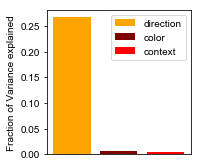

In [49]:
# Figure 1e - top
# This PMd code requires the local datapath (chand_data_path) to the neural data.

import scipy.io
chand_data_path = '/Users/michael/GoogleDrive/forKaoAndKleinman/'
Cdata = scipy.io.loadmat(chand_data_path + 'Data_June2020_choice_color.mat')
neural_data = Cdata['summarizedData'][0, 0]['choiceandcolor'][0,0]['check'][0,0]['FR']
neural_data = neural_data.swapaxes(1, 3)
neural_data = neural_data.swapaxes(2, 3)

# checkerboard turns on at 600
dpca_neural_early = dPCA.dPCA(labels='tdc', join={'td': ['d', 'td'], 'tc': ['c', 'tc'], 'tdc': ['dc', 'tdc']}, n_components=5)
Z = dpca_neural_early.fit_transform(neural_data[:, 600:1400, :, :])
cvar, dvar, xvar = dpca_neural_early.calculate_variance(neural_data[:, 600:1400, :, :])

fig = plt.figure(figsize=(2,2))

ax = fig.add_axes([0,0,1,1])
ax.bar(0.00, dvar, color = 'orange', width = 0.2, label='direction')
ax.bar(0.25, cvar, color = 'maroon', width = 0.2, label='color')
ax.bar(0.50, xvar, color = 'r', width = 0.2, label='context')
plt.ylabel('Fraction of Variance explained')
# plt.xlabel('Area')
plt.xticks([])
plt.legend()

plt.savefig(savepath_exemplar_figs + 'neural_dpca' + '.pdf')

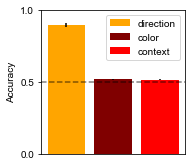

In [50]:
# Figure 1e - bottom

# From Chand:
dacc = 0.8974
cacc = 0.5222
xacc = 0.5193
dsem = 0.0115
csem = 0.0038
xsem = 0.0039

fig = plt.figure(figsize=(2,2))


ax = fig.add_axes([0,0,1,1])
ax.bar(0.00, dacc, color = 'orange', width = 0.2, yerr=dsem, label='direction')
ax.bar(0.25, cacc, color = 'maroon', width = 0.2, yerr=csem, label='color')
ax.bar(0.50, xacc, color = 'r', width = 0.2, yerr=xsem, label='context')
plt.ylabel('Accuracy')
# plt.xlabel('Area')
plt.xticks([])
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
plt.legend()
plt.axhline(0.5, linestyle='--', color='k', alpha = 0.5)

plt.savefig(savepath_exemplar_figs + 'neural_decode_linear' + '.pdf')

## pca vs potent space

97.69923556140742
39.94217110181502


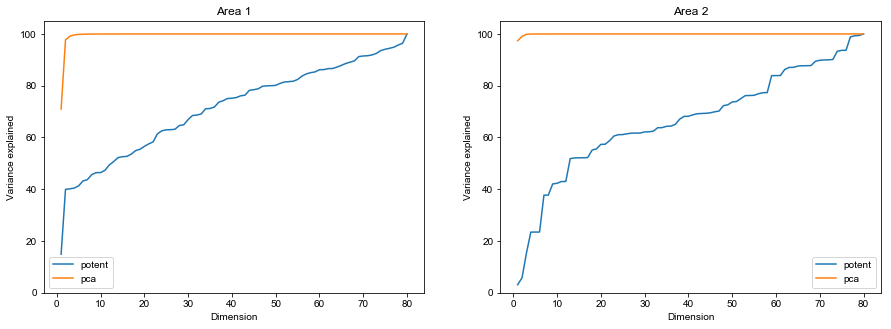

In [51]:
# Figure S11

def pca(data):  # the dimensions are rows, the observations are columns                                                                                                                  
    means           = np.mean(data, axis=1)
    data_centered   = (data.T - means).T
    evecs, evals, _ = np.linalg.svd(np.cov(data_centered))
    scores          = np.dot(evecs.T, data_centered)
    return evecs, evals, scores, means

rnn = retrieve_object('rnn.p', loadpath_exemplar_data)
psths = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
# psths = retrieve_object('psths_dirs_coh.p', loadpath_data)

Wrec = rnn.Wrec
W12 = Wrec[80:160, 0:80]
W23 = Wrec[160:240, 80:160]
num_cond1 = 2
num_cond2 = len(psths) // num_cond1
idx1 = np.arange(0,80)
idx2 = np.arange(80,160)
X1 = np.zeros((len(idx1), 210, num_cond1, num_cond2))
X2 = np.zeros((len(idx2), 210, num_cond1, num_cond2))

for i in range(num_cond1):
    for j in range(num_cond2):
        X1[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx1, 90:300]
        X2[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx2, 90:300]

        
conc_psths_1 = X1.reshape(len(idx1), -1)
conc_psths_2 = X2.reshape(len(idx2), -1)
_, evals1, _, _ = pca(conc_psths_1)
_, evals2, _, _ = pca(conc_psths_2)
ps_store_1 = np.zeros((80, ))
ps_store_2 = np.zeros((80, ))
pca_store_1 = np.zeros(80)
pca_store_2 = np.zeros(80)

for n in range(1, 81):
    _, _, v1t = np.linalg.svd(W12)
    _, _, v2t = np.linalg.svd(W23)
    v1 = v1t.T
    v2 = v2t.T
    ps1 = v1[:, :n]
    ps2 = v2[:, :n]
    conc_var_ps_1 = np.sum(np.var(ps1.T.dot(conc_psths_1), axis = 1))
    conc_var_tot_1 = np.sum(np.var(conc_psths_1, axis = 1))
    ps_store_1[n-1] = conc_var_ps_1/conc_var_tot_1 * 100
    conc_var_ps_2 = np.sum(np.var(ps2.T.dot(conc_psths_2), axis = 1))
    conc_var_tot_2 = np.sum(np.var(conc_psths_2, axis = 1))
    ps_store_2[n-1] = conc_var_ps_2/conc_var_tot_2 * 100
    pca_store_1[n-1] = np.sum(evals1[:n])/np.sum(evals1) * 100
    pca_store_2[n-1] = np.sum(evals2[:n])/np.sum(evals2) * 100

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1, 81), ps_store_1, label = 'potent')
plt.plot(range(1, 81), pca_store_1, label = 'pca')
plt.xlabel('Dimension')
plt.ylabel('Variance explained')
plt.ylim([0, 105])
plt.title('Area 1')
plt.legend()

plt.subplot(122)
plt.plot(range(1, 81), ps_store_2, label = 'potent')
plt.plot(range(1, 81), pca_store_2, label = 'pca')
plt.xlabel('Dimension')
plt.ylabel('Variance explained')
plt.ylim([0, 105])
plt.title('Area 2')
plt.legend()

print(pca_store_1[1])
print(ps_store_1[1])
plt.savefig(savepath_exemplar_figs + 'pca_potent_exc' + '.pdf')

In [52]:
def pca(data):  # the dimensions are rows, the observations are columns                                                                                                                  
    means           = np.mean(data, axis=1)
    data_centered   = (data.T - means).T
    evecs, evals, _ = np.linalg.svd(np.cov(data_centered))
    scores          = np.dot(evecs.T, data_centered)
    return evecs, evals, scores, means

psths = retrieve_object('psths_dirs_coh.p', loadpath_exemplar_data)
# psths = retrieve_object('psths_dir_scol.p', loadpath_data)

num_cond1 = 2
num_cond2 = len(psths) // num_cond1
idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80,160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160,240), np.arange(280, 300)))

X1 = np.zeros((len(idx1), 210, num_cond1, num_cond2))
X2 = np.zeros((len(idx2), 210, num_cond1, num_cond2))
X3 = np.zeros((len(idx3), 210, num_cond1, num_cond2))

for i in range(num_cond1):
    for j in range(num_cond2):
        X1[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx1, 90:300]
        X2[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx2, 90:300]
        X3[:, :, i, j] = psths[i * num_cond1 + j]['psth'][idx3, 90:300]


conc_psths_1 = X1.reshape(len(idx1), -1)
conc_psths_2 = X2.reshape(len(idx2), -1)
conc_psths_3 = X3.reshape(len(idx3), -1)

_, evals1, _, _ = pca(conc_psths_1)
_, evals2, _, _ = pca(conc_psths_2)
_, evals3, _, _ = pca(conc_psths_3)

print('Top 2 Components')
print('Area 1 Variance: ' + str(np.sum(evals1[:2])/np.sum(evals1) * 100))
print('Area 2 Variance: ' + str(np.sum(evals2[:2])/np.sum(evals2) * 100))
print('Area 3 Variance: ' + str(np.sum(evals3[:2])/np.sum(evals3) * 100))

Top 2 Components
Area 1 Variance: 97.65656521663678
Area 2 Variance: 99.17356607563899
Area 3 Variance: 94.27053667002886


## Inputs sorted by coherence and dpca
Figure 8a. Note: To run this is requires `psths_dirs_coh.p` (which is ~1.5Gb) to be in `loadpath_exemplar_data`. You can generate the data in Revision_exemplar.ipynb (saving psth related data cells -- this takes ~30minutes), or download the the file at the following google drive link https://drive.google.com/file/d/1kpnGj4_tgxMdzzzBc4ND_1s8Op9-_m6a/view?usp=sharing.

In [53]:
import matplotlib.cm as cm
from __future__ import division
def coh_r(cb_cond):
    return 2*(cb_cond / 225) - 1

def plot_linestyle(*args):
    linestyle = '-'
    for left_right, cond in args:
        if left_right == -1: #and cond > 112 or left_right == 1 and cond < 112:
            linestyle = '--'
        else:
            linestyle = '-'
    return linestyle


def plot_color(*args):
    cond_color = (0, 0, 0, 1)       # cm returns (red, green, blue, alpha)
    for sortable, value in args:
        cond_color  = cm.RdYlGn(1 - (1 + coh_r(value)) / 2)
    return cond_color


area3 = True
psths_dpca = retrieve_object('psths_dir_scol.p', loadpath_exemplar_data)
psths = retrieve_object('psths_dirs_coh.p', loadpath_exemplar_data)
rnn = retrieve_object('rnn.p', loadpath_exemplar_data)
idx1 = np.hstack((np.arange(160,240), np.arange(280, 300))) # excitatory and inhibitory

if (area3):
    idx1 = np.hstack((np.arange(160,240), np.arange(280, 300))) # area 3
W23 = rnn.Wrec[160:240, 80:160]


num_cond1 = 2
num_cond2 = len(psths_dpca) // num_cond1
X = np.zeros((len(idx1), 210, num_cond1, num_cond2))
for i in range(num_cond1):
    for j in range(num_cond2):
        X[:, :, i, j] = psths_dpca[i * num_cond1 + j]['psth'][idx1, 90:300]

dpca_output = dPCA.dPCA(labels='tdc', join={'td': ['d', 'td'], 'tc': ['c', 'tc'], 'tdc': ['dc', 'tdc']}, n_components=1)
Z = dpca_output.fit_transform(X)
cvar, dvar, xvar = dpca_output.calculate_variance(X)

def plot_inps_axes(key = 'd'):
    for i in range(len(psths)):        
        inps = psths[i]['u_psth']
        if area3:
            proj_inps = W23.dot(psths[i]['psth'][80:160, 90:300])
            proj_inps = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1)[:80], proj_inps)
        else:
            proj_inps = rnn.Win.dot(inps)[idx1, 90:300]
            proj_inps = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1), proj_inps)

        act = psths[i]['psth']
        proj_act = act[idx1, 90:300]
        proj_act = np.dot(np.linalg.pinv(dpca_output.P[key]).reshape(-1), proj_act)
 
        cond_color  = plot_color(psths[i]['cond'])
        cond_ls     = plot_linestyle(psths[i]['cond'])
        
        plt.plot(proj_inps, 'k', alpha=0.4, linestyle=cond_ls)
        plt.plot(proj_act, color=cond_color, linestyle=cond_ls)
    
    savepath = savepath_figs
    plt.ylabel('Projections (au)')
    plt.xlabel('Time')
    plt.xticks([0, 60], ['Targ on', 'Check on'])
    suffix_area = ''
    if area3:
        suffix_area = '_a3'
    plt.savefig(savepath + 'dpca_inps_' + key + suffix_area + '.pdf')
    
    

tdc variance: 0.0005618333082070789
td variance: 0.415184988272283
t variance: 0.5682087265846727
tc variance: 0.0003622237796874391


Text(0.5,1,'context')

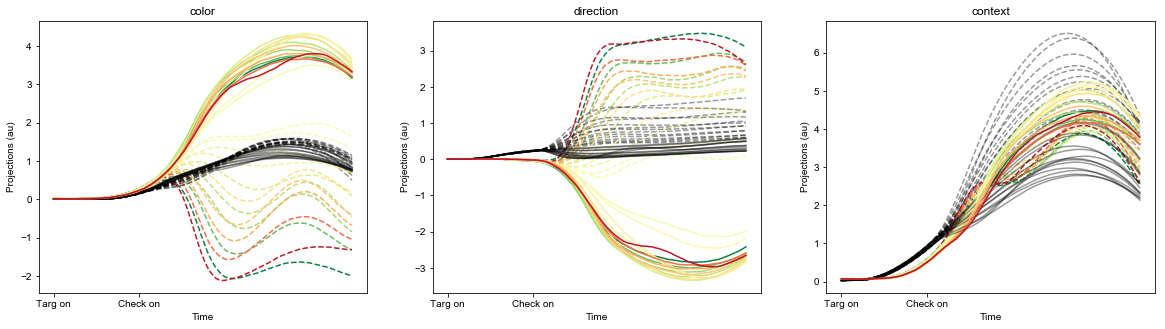

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plot_inps_axes(key='tc')
plt.title('color')
plt.subplot(132)
plot_inps_axes(key='td')
plt.title('direction')
plt.subplot(133)
plot_inps_axes(key='tdc')
plt.title('context')


## plotting behavior

These are the psychometric plots for the 3-area networks (S1) and 1-area networks (S2).

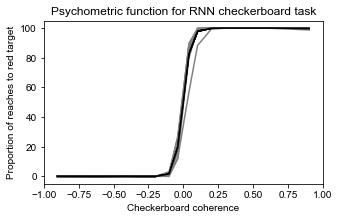

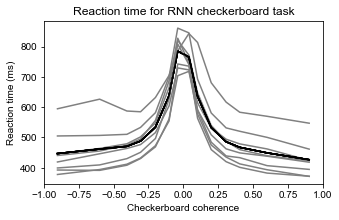

In [55]:
cohs_store = np.load(loadpath_exemplar_data + 'cohs_store.npy')
red_rates_store = np.load(loadpath_exemplar_data + 'red_rates_store.npy')
rts_cond_store = np.load(loadpath_exemplar_data + 'rts_cond_store.npy')

cohs_store = np.load(loadpath_exemplar_data + 'cohs_store.npy')
red_rates_store = np.load(loadpath_exemplar_data + 'red_rates_store.npy')
rts_cond_store = np.load(loadpath_exemplar_data + 'rts_cond_store.npy')

plt.figure(figsize=(5, 3))
for i in range(cohs_store.shape[1]):
    plt.plot(cohs_store[:, i], red_rates_store[:, i], 'grey') #, marker='.', markersize=2
    plt.plot(np.mean(cohs_store, axis=1), np.mean(red_rates_store, axis =1), 'k')

plt.ylim((-0.05, 1.05))
plt.xlim((-1.0, 1.0))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], [0, 20, 40, 60, 80, 100])
plt.xlabel('Checkerboard coherence')
plt.ylabel('Proportion of reaches to red target')
plt.title('Psychometric function for RNN checkerboard task')

plt.savefig(savepath_exemplar_figs + '/psych_three.pdf')

plt.figure(figsize=(5, 3))
for i in range(cohs_store.shape[1]):
    plt.plot(cohs_store[:, i], rts_cond_store[:, i], 'grey') #, marker='.', markersize=2
    plt.plot(np.mean(cohs_store, axis=1), np.mean(rts_cond_store, axis =1), 'k')

plt.xlim((-1.0, 1.0))
plt.xlabel('Checkerboard coherence')
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for RNN checkerboard task')

plt.savefig(savepath_exemplar_figs + '/rt_three.pdf')

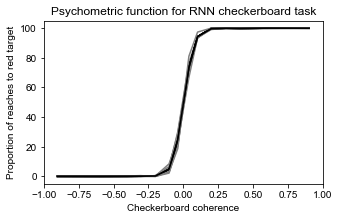

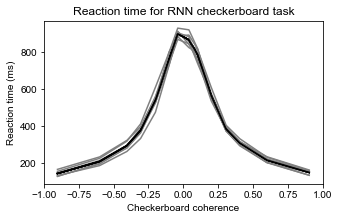

In [56]:
cohs_store = np.load(loadpath_exemplar_data + '1area_cohs_store.npy')
red_rates_store = np.load(loadpath_exemplar_data + '1area_red_rates_store.npy')
rts_cond_store = np.load(loadpath_exemplar_data + '1area_rts_cond_store.npy')

cohs_store = np.load(loadpath_exemplar_data + '1area_cohs_store.npy')
red_rates_store = np.load(loadpath_exemplar_data + '1area_red_rates_store.npy')
rts_cond_store = np.load(loadpath_exemplar_data + '1area_rts_cond_store.npy')

plt.figure(figsize=(5, 3))
for i in range(cohs_store.shape[1]):
    plt.plot(cohs_store[:, i], red_rates_store[:, i], 'grey') #, marker='.', markersize=2
    plt.plot(np.mean(cohs_store, axis=1), np.mean(red_rates_store, axis =1), 'k')

plt.ylim((-0.05, 1.05))
plt.xlim((-1.0, 1.0))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], [0, 20, 40, 60, 80, 100])
plt.xlabel('Checkerboard coherence')
plt.ylabel('Proportion of reaches to red target')
plt.title('Psychometric function for RNN checkerboard task')

plt.savefig(savepath_exemplar_figs + '/psych_single.pdf')

plt.figure(figsize=(5, 3))
for i in range(cohs_store.shape[1]):
    plt.plot(cohs_store[:, i], rts_cond_store[:, i], 'grey') #, marker='.', markersize=2
    plt.plot(np.mean(cohs_store, axis=1), np.mean(rts_cond_store, axis =1), 'k')

plt.xlim((-1.0, 1.0))
plt.xlabel('Checkerboard coherence')
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time for RNN checkerboard task')

plt.savefig(savepath_exemplar_figs + '/rt_single.pdf')
